In [2]:
#importing libraries
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
import math
from keras.layers import Conv2D, Conv1D, AveragePooling2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from keras.preprocessing.image import ImageDataGenerator
import time
from keras.callbacks import TensorBoard
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import csv
from keras.utils.vis_utils import plot_model
from keras.callbacks import History, LearningRateScheduler, TensorBoard
from matplotlib import pyplot as plt
import keras
from keras import backend as K 
K.clear_session()
from keras.layers import BatchNormalization

Using TensorFlow backend.


In [ ]:
#generating new dataset containing images of faces from the LFW dataset
def new_dataset():
    train_data = ImageDataGenerator()
    #the dataset for face recogniton has lot of labeled faces with name of the person
    #making a new folder with all the images as one label
    j = 0

    train = train_data.flow_from_directory('lfw',target_size=(i,i), batch_size=64, shuffle= False, class_mode='categorical', save_to_dir = 'Faces\0', save_prefix = 'jpg', subset='training', seed=3)
    while(j < 207):
        train_x, train_y = train.next()
        j = j+1

In [ ]:
#Creatining noisy image data folder
import numpy
from PIL import Image
#creating random noise images as the second class
def add_noisy_class():
    for n in range(10000):
        a = numpy.random.rand(128, 128, 3) * 255
        im_out = Image.fromarray(a.astype('uint8')).convert('RGB')
        im_out.save('Faces/0/out%000d.jpg' % n)

In [4]:
#loading the data
#image size
i = 32
train_data = ImageDataGenerator(rescale=1./255, validation_split = 0.2, rotation_range = 10, shear_range = .2 , zoom_range = .1, width_shift_range = .1, height_shift_range = .1)
test_data = ImageDataGenerator(rescale=1./255, validation_split = 0.2)
training = train_data.flow_from_directory('Faces', target_size=(i,i), batch_size=64, class_mode='binary', subset='training', seed=3)
test = test_data.flow_from_directory('Faces', target_size=(i,i), batch_size=64, class_mode='binary', subset='validation', seed = 3)

Found 18587 images belonging to 2 classes.
Found 4646 images belonging to 2 classes.


In [5]:
#taking a look at the images
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from matplotlib import colors, cm, pyplot as plt
import numpy as np
def show_grid(image_list,nrows,ncols,label_list=None,show_labels=False,savename=None,figsize=(10,10),showaxis='off'):
    if type(image_list) is not list:
        if(image_list.shape[-1]==1):
            image_list = [image_list[i,:,:,0] for i in range(image_list.shape[0])]
        elif(image_list.shape[-1]==3):
            image_list = [image_list[i,:,:,:] for i in range(image_list.shape[0])]
    fig = plt.figure(None, figsize,frameon=False)
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                     nrows_ncols=(nrows, ncols),  # creates 2x2 grid of axes
                     axes_pad=0.3,  # pad between axes in inch.
                     share_all=True,
                     )
    for i in range(nrows*ncols):
        ax = grid[i]
        ax.imshow(image_list[i],cmap='Greys_r')  # The AxesGrid object work as a list of axes.
        ax.axis('off') 
        if show_labels:  
            ax.set_title(class_mapping[y_int[i]])
    if savename != None:
        plt.savefig(savename,bbox_inches='tight')

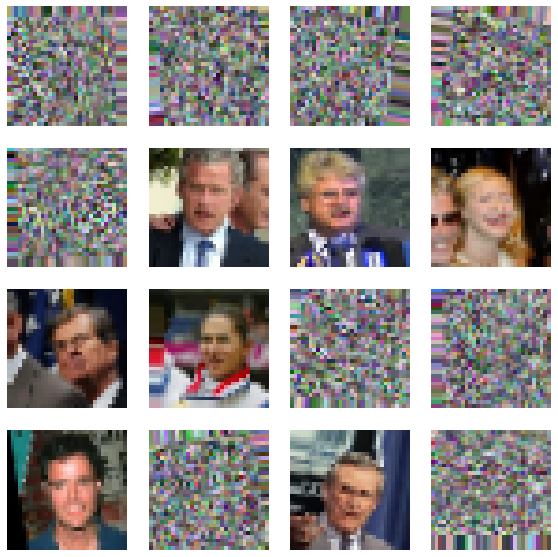

In [6]:
train_x, train_y = training.next()
show_grid(train_x,4,4,figsize=(20,10))

In [7]:
#initiating tensorboard
NAME = "Face_Recog_v2{}".format(int(time.time()))
print(NAME)
tensorboard = TensorBoard(log_dir='final_v2\{}'.format(NAME), update_freq='epoch')

Face_Recog_v21639082027


In [8]:
#proposed model

model = Sequential()

model.add(Conv2D(32,(3,3),input_shape=(i,i,3),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2), padding="same"))

model.add(Conv2D(32,(3,3),padding="same",use_bias=True, activation="relu"))
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2,2), padding="valid"))

model.add(Conv2D(64,(3,3),padding="same",use_bias=True ,activation="relu"))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2,2), padding="same"))

model.add(Conv2D(64,(3,3),padding="same",use_bias=True, activation="relu"))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(2,2), padding="valid"))

model.add(Conv2D(128,(3,3),padding="same",use_bias=True, activation="relu"))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(2,2), padding="same"))

model.add(Conv2D(512,(3,3),padding="same",use_bias=True, activation="relu"))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2,2),padding="same"))

model.add(Flatten())

model.add(Dense(1024,activation="relu",use_bias=True))
model.add(Dropout(0.1))
model.add(Dense(512,activation="relu",use_bias=True))

model.add(Dense(units=2, activation="softmax"))

opt= Adam(lr=.0005)
model.compile(optimizer=opt, loss = "sparse_categorical_crossentropy", metrics= ["accuracy"])

history = History()
model.fit_generator(training, epochs=30, validation_data=test, callbacks=[tensorboard,history])

Epoch 1/30
291/291 [==============================] - 87s 300ms/step - loss: 0.0743 - accuracy: 0.9712 - val_loss: 6.6285e-04 - val_accuracy: 0.9998
Epoch 2/30
291/291 [==============================] - 85s 291ms/step - loss: 0.0020 - accuracy: 0.9996 - val_loss: 5.0637e-04 - val_accuracy: 1.0000
Epoch 3/30
291/291 [==============================] - 88s 302ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 3.9537e-04 - val_accuracy: 1.0000
Epoch 4/30
291/291 [==============================] - 92s 315ms/step - loss: 3.9241e-04 - accuracy: 0.9999 - val_loss: 3.3317e-04 - val_accuracy: 1.0000
Epoch 5/30
291/291 [==============================] - 90s 308ms/step - loss: 1.5648e-06 - accuracy: 1.0000 - val_loss: 2.0210e-04 - val_accuracy: 1.0000
Epoch 6/30
291/291 [==============================] - 90s 310ms/step - loss: 1.1177e-06 - accuracy: 1.0000 - val_loss: 1.2337e-04 - val_accuracy: 1.0000
Epoch 7/30
291/291 [==============================] - 91s 311ms/step - loss: 3.8033e-05 - accu

In [9]:
#proposed model summary and history
print(model.summary())
print(history.history.keys())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 8, 8, 64)         

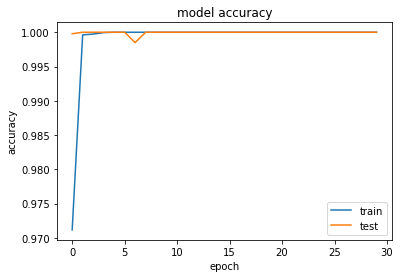

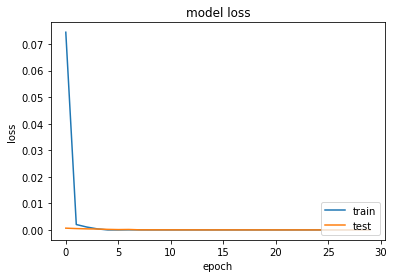

In [12]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

<h1> Face vs Noise testing </h1>

Found 4646 images belonging to 2 classes.
[0 0 0 ... 1 1 1]
Confusion Matrix
[[2000    0]
 [   0 2646]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2000
           1       1.00      1.00      1.00      2646

    accuracy                           1.00      4646
   macro avg       1.00      1.00      1.00      4646
weighted avg       1.00      1.00      1.00      4646



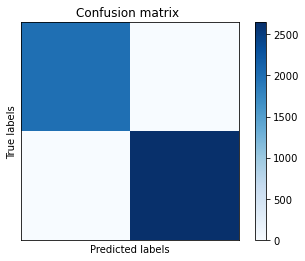

/Users/chandrikasaha/opt/anaconda3/envs/tf_keras/lib/python3.6/site-packages/keras/engine/saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


In [13]:
#testing face vs noise
import csv
testp = test_data.flow_from_directory('Faces', target_size=(i,i), batch_size=64, class_mode='binary', subset='validation', seed = 3, shuffle=False)        

t_pred = model.predict_generator(testp)

pred = np.argmax(t_pred, axis=1)
print(pred)
print('Confusion Matrix')
conf = confusion_matrix(testp.classes, pred)
print(conf)
print('Classification Report')
target_names = ['0', '1']
f1 = classification_report(testp.classes, pred, target_names=target_names)
print(f1)


plt.imshow(conf, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks([], [])
plt.yticks([], [])
plt.title('Confusion matrix ')
plt.colorbar()
plt.show()

f = open("FaceConf_v2.csv",'w')
a = []
for i in range (0,2):
   #print("\n")
   for j in range(0,2):
        a.append(conf[i][j])
       #print(conf[i][j], end='')
        csv.writer(f).writerow(a)
        a = []
f.close()

model.save('face.h5')

<h1> Masked Face vs Noise Recognition: transfer from face recognition </h1>

In [15]:
#loading masked images data
i = 32
train_data = ImageDataGenerator(rescale=1./255, validation_split = 0.2, rotation_range = 10, shear_range = .2 , zoom_range = .1, width_shift_range = .1, height_shift_range = .1)
test_data = ImageDataGenerator(rescale=1./255, validation_split = 0.2)
training_m = train_data.flow_from_directory('CMFD', target_size=(i,i), batch_size=64, class_mode='binary', subset='training', seed=3)
test_m = test_data.flow_from_directory('CMFD', target_size=(i,i), batch_size=64, class_mode='binary', subset='validation', seed = 3)

Found 16000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


In [16]:
from keras.models import load_model
#loading face recognition model, removing last two layers for transfer learning
model_m = load_model('face.h5')
model_m = keras.models.Sequential(model_m.layers[:-2])

#add last two model to train the face mask recogniton
model_m.add(Dense(512,activation="relu",use_bias=True))
model_m.add(Dense(units=2, activation="softmax"))

#freez all but the last two layers: transfer learning
for layer in model_m.layers[:-2]:
    layer.trainable = False

/Users/chandrikasaha/opt/anaconda3/envs/tf_keras/lib/python3.6/site-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [17]:
model_m.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 8, 8, 64)         

In [18]:
NAME = "Masked_Face_Recog_v2{}".format(int(time.time()))
print(NAME)
tensorboard_m = TensorBoard(log_dir='final_v2\{}'.format(NAME), update_freq='epoch')

Masked_Face_Recog_v21639084962


In [19]:
#train the model for masked face recogniton
opt= Adam(lr=.0005)
model_m.compile(optimizer=opt, loss = "sparse_categorical_crossentropy", metrics= ["accuracy"])

history_m = History()
model_m.fit_generator(training_m, epochs=20, validation_data=test_m, callbacks=[tensorboard_m,history_m])

Epoch 1/20
250/250 [==============================] - 112s 448ms/step - loss: 0.0068 - accuracy: 0.9959 - val_loss: 0.0084 - val_accuracy: 0.9998
Epoch 2/20
250/250 [==============================] - 108s 431ms/step - loss: 8.4469e-04 - accuracy: 0.9998 - val_loss: 0.0047 - val_accuracy: 0.9998
Epoch 3/20
250/250 [==============================] - 108s 433ms/step - loss: 6.5666e-04 - accuracy: 0.9999 - val_loss: 0.0019 - val_accuracy: 0.9998
Epoch 4/20
250/250 [==============================] - 108s 433ms/step - loss: 6.8384e-04 - accuracy: 0.9998 - val_loss: 8.2184e-04 - val_accuracy: 0.9998
Epoch 5/20
250/250 [==============================] - 109s 435ms/step - loss: 0.0014 - accuracy: 0.9998 - val_loss: 7.5793e-04 - val_accuracy: 0.9998
Epoch 6/20
250/250 [==============================] - 109s 436ms/step - loss: 6.5615e-04 - accuracy: 0.9998 - val_loss: 4.9455e-04 - val_accuracy: 0.9998
Epoch 7/20
250/250 [==============================] - 111s 445ms/step - loss: 9.3667e-04 - accur

In [20]:
print(model_m.summary())
print(history_m.history.keys())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 8, 8, 64)         

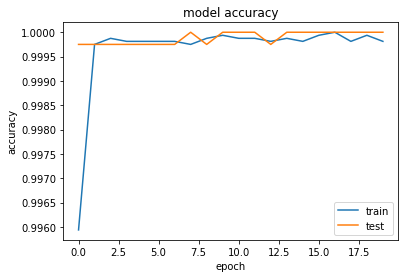

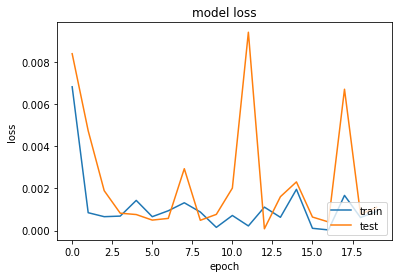

In [21]:
#plot_model(model_m, to_file='Mask_Recog.png')
# summarize history for accuracy
plt.plot(history_m.history['accuracy'])
plt.plot(history_m.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history_m.history['loss'])
plt.plot(history_m.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

Found 4000 images belonging to 2 classes.
[[9.9814522e-01 1.8548111e-03]
 [9.9836844e-01 1.6316202e-03]
 [9.9864131e-01 1.3586915e-03]
 ...
 [9.7710925e-26 1.0000000e+00]
 [1.3491814e-20 1.0000000e+00]
 [2.5771468e-35 1.0000000e+00]]
[0 0 0 ... 1 1 1]
Confusion Matrix
[[2000    0]
 [   0 2000]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2000
           1       1.00      1.00      1.00      2000

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



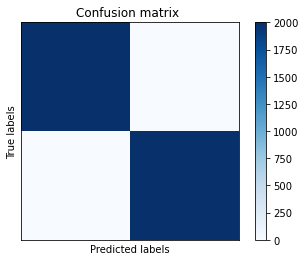

/Users/chandrikasaha/opt/anaconda3/envs/tf_keras/lib/python3.6/site-packages/keras/engine/saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


In [22]:
#Testing the model on masked face vs noise dataset
i = 32
test_data_m = ImageDataGenerator(rescale=1./255, validation_split = 0.2)
testp_m = test_data_m.flow_from_directory('CMFD', target_size=(i,i), batch_size=64, class_mode='binary', subset='validation', seed = 3, shuffle=False)        

t_pred = model_m.predict_generator(testp_m)
print(t_pred)
pred = np.argmax(t_pred, axis=1)
print(pred)
print('Confusion Matrix')
conf = confusion_matrix(testp_m.classes, pred)
print(conf)
print('Classification Report')
target_names = ['0', '1']
f1 = classification_report(testp_m.classes, pred, target_names=target_names)
print(f1)


plt.imshow(conf, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks([], [])
plt.yticks([], [])
plt.title('Confusion matrix ')
plt.colorbar()
plt.show()

f = open("MaskConf.csv",'w')
a = []
for i in range (0,2):
   #print("\n")
   for j in range(0,2):
        a.append(conf[i][j])
       #print(conf[i][j], end='')
        csv.writer(f).writerow(a)
        a = []
f.close()

model_m.save('mask.h5')

<h3> Face vs Noise Recognition: transfer from Masked face </h3> 

In [24]:
model_m = load_model('mask.h5')
model_m = keras.models.Sequential(model_m.layers[:-2])

#add last two model to train the face mask recogniton
model_m.add(Dense(512,activation="relu",use_bias=True))
model_m.add(Dense(units=2, activation="softmax"))

#freez all but the last two layers: transfer learning
for layer in model_m.layers[:-2]:
    layer.trainable = False
    
#loading the data
#image size
i = 32
train_data = ImageDataGenerator(rescale=1./255, validation_split = 0.2, rotation_range = 10, shear_range = .2 , zoom_range = .1, width_shift_range = .1, height_shift_range = .1)
test_data = ImageDataGenerator(rescale=1./255, validation_split = 0.2)
training = train_data.flow_from_directory('Faces', target_size=(i,i), batch_size=64, class_mode='binary', subset='training', seed=3)
test = test_data.flow_from_directory('Faces', target_size=(i,i), batch_size=64, class_mode='binary', subset='validation', seed = 3)


NAME = "Masked_Face_Recog_v2{}".format(int(time.time()))
print(NAME)
tensorboard_m = TensorBoard(log_dir='final_v2\{}'.format(NAME), update_freq='epoch')

#train the model for masked face recogniton
opt= Adam(lr=.0005)
model_m.compile(optimizer=opt, loss = "sparse_categorical_crossentropy", metrics= ["accuracy"])

history_m = History()
model_m.fit_generator(training_m, epochs=15, validation_data=test_m, callbacks=[tensorboard_m,history_m])

/Users/chandrikasaha/opt/anaconda3/envs/tf_keras/lib/python3.6/site-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


Found 18587 images belonging to 2 classes.
Found 4646 images belonging to 2 classes.
Masked_Face_Recog_v21639087415
Epoch 1/15
250/250 [==============================] - 117s 467ms/step - loss: 0.0054 - accuracy: 0.9994 - val_loss: 0.0052 - val_accuracy: 0.9998
Epoch 2/15
250/250 [==============================] - 111s 445ms/step - loss: 0.0019 - accuracy: 0.9996 - val_loss: 0.0086 - val_accuracy: 0.9998
Epoch 3/15
250/250 [==============================] - 109s 434ms/step - loss: 0.0014 - accuracy: 0.9996 - val_loss: 6.9859e-04 - val_accuracy: 0.9998
Epoch 4/15
250/250 [==============================] - 111s 443ms/step - loss: 9.6591e-04 - accuracy: 0.9998 - val_loss: 0.0129 - val_accuracy: 0.9998
Epoch 5/15
250/250 [==============================] - 116s 464ms/step - loss: 0.0015 - accuracy: 0.9997 - val_loss: 0.0037 - val_accuracy: 0.9998
Epoch 6/15
250/250 [==============================] - 116s 464ms/step - loss: 0.0013 - accuracy: 0.9998 - val_loss: 0.0040 - val_accuracy: 1.0000


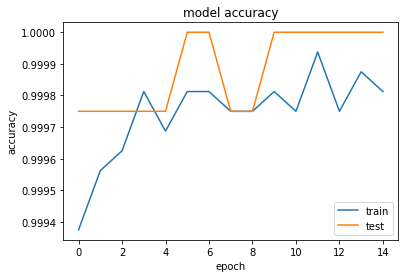

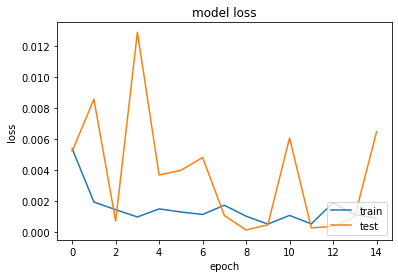

In [25]:
#plot_model(model_m, to_file='Mask_Recog.png')
# summarize history for accuracy
plt.plot(history_m.history['accuracy'])
plt.plot(history_m.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history_m.history['loss'])
plt.plot(history_m.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

In [26]:
#testing face vs noise
i=32
testp = test_data.flow_from_directory('Faces', target_size=(i,i), batch_size=64, class_mode='binary', subset='validation', seed = 3, shuffle=False)        
print(testp)
t_pred = model_m.predict_generator(testp)
print(t_pred)
pred = np.argmax(t_pred, axis=1)
print(pred)
print('Confusion Matrix')
conf = confusion_matrix(testp.classes, pred)
print(conf)
print('Classification Report')
target_names = ['0', '1']
f1 = classification_report(testp.classes, pred, target_names=target_names)
print(f1)
model_m.save('Face_from_Mask.h5')

Found 4646 images belonging to 2 classes.
[[9.8556674e-01 1.4433248e-02]
 [9.8693269e-01 1.3067308e-02]
 [9.8878330e-01 1.1216677e-02]
 ...
 [9.9846769e-33 1.0000000e+00]
 [2.3833357e-21 1.0000000e+00]
 [2.4668503e-18 1.0000000e+00]]
[0 0 0 ... 1 1 1]
Confusion Matrix
[[2000    0]
 [   0 2646]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2000
           1       1.00      1.00      1.00      2646

    accuracy                           1.00      4646
   macro avg       1.00      1.00      1.00      4646
weighted avg       1.00      1.00      1.00      4646



/Users/chandrikasaha/opt/anaconda3/envs/tf_keras/lib/python3.6/site-packages/keras/engine/saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


<h1> Face and Masked Face Recognition: transfer from face </h1>

In [35]:
#loading masked images data
i = 32
train_data = ImageDataGenerator(rescale=1./255, validation_split = 0.2, rotation_range = 10, shear_range = .2 , zoom_range = .1, width_shift_range = .1, height_shift_range = .1)
test_data = ImageDataGenerator(rescale=1./255, validation_split = 0.2)
training_m = train_data.flow_from_directory('MaskFace', target_size=(i,i), batch_size=64, class_mode='binary', subset='training', seed=3)
test_m = test_data.flow_from_directory('MaskFace', target_size=(i,i), batch_size=64, class_mode='binary', subset='validation', seed = 3)

Found 18587 images belonging to 2 classes.
Found 4646 images belonging to 2 classes.


/Users/chandrikasaha/opt/anaconda3/envs/tf_keras/lib/python3.6/site-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


Mask_and_Face_Recog_v21639090939
Epoch 1/15
291/291 [==============================] - 129s 443ms/step - loss: 0.6552 - accuracy: 0.6021 - val_loss: 0.7064 - val_accuracy: 0.4552
Epoch 2/15
291/291 [==============================] - 123s 422ms/step - loss: 0.6138 - accuracy: 0.6671 - val_loss: 0.8073 - val_accuracy: 0.4307
Epoch 3/15
291/291 [==============================] - 121s 417ms/step - loss: 0.5981 - accuracy: 0.6826 - val_loss: 0.8959 - val_accuracy: 0.4307
Epoch 4/15
291/291 [==============================] - 121s 417ms/step - loss: 0.5827 - accuracy: 0.6982 - val_loss: 0.8558 - val_accuracy: 0.4305
Epoch 5/15
291/291 [==============================] - 122s 419ms/step - loss: 0.5689 - accuracy: 0.7102 - val_loss: 0.9775 - val_accuracy: 0.4307
Epoch 6/15
291/291 [==============================] - 121s 415ms/step - loss: 0.5683 - accuracy: 0.7081 - val_loss: 1.1784 - val_accuracy: 0.4305
Epoch 7/15
291/291 [==============================] - 124s 426ms/step - loss: 0.5699 - accu

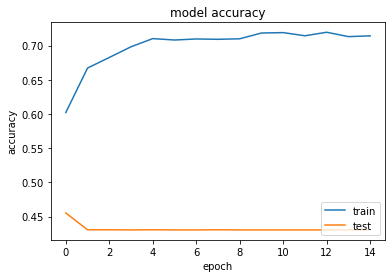

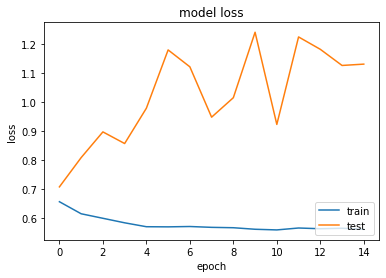

In [33]:
from keras.models import load_model
#loading face recognition model, removing last two layers for transfer learning
model_m = load_model('Face.h5')
model_m = keras.models.Sequential(model_m.layers[:-2])

#add last two model to train the face mask recogniton
model_m.add(Dense(512,activation="relu",use_bias=True))
model_m.add(Dense(units=2, activation="softmax"))

#freez all but the last two layers: transfer learning
for layer in model_m.layers[:-2]:
    layer.trainable = False

NAME = "Mask_and_Face_Recog_v2{}".format(int(time.time()))
print(NAME)
tensorboard_m = TensorBoard(log_dir='final_mask_and_face_v2\{}'.format(NAME), update_freq='epoch')

#train the model for masked face recogniton
opt= Adam(lr=.0005)
model_m.compile(optimizer=opt, loss = "sparse_categorical_crossentropy", metrics= ["accuracy"])

history_m = History()
model_m.fit_generator(training_m, epochs=15, validation_data=test_m, callbacks=[tensorboard_m,history_m])

print(model_m.summary())
print(history_m.history.keys())

#plot_model(model_m, to_file='Mask_Recog.png')
# summarize history for accuracy
plt.plot(history_m.history['accuracy'])
plt.plot(history_m.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history_m.history['loss'])
plt.plot(history_m.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

Found 4646 images belonging to 2 classes.
[[0.15616553 0.84383446]
 [0.1015235  0.89847654]
 [0.10029171 0.8997083 ]
 ...
 [0.10006292 0.89993715]
 [0.10188626 0.8981138 ]
 [0.11968252 0.8803175 ]]
[1 1 1 ... 1 1 1]
Confusion Matrix
[[   0 2646]
 [   0 2000]]
Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2646
           1       0.43      1.00      0.60      2000

    accuracy                           0.43      4646
   macro avg       0.22      0.50      0.30      4646
weighted avg       0.19      0.43      0.26      4646



/Users/chandrikasaha/opt/anaconda3/envs/tf_keras/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/chandrikasaha/opt/anaconda3/envs/tf_keras/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/chandrikasaha/opt/anaconda3/envs/tf_keras/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

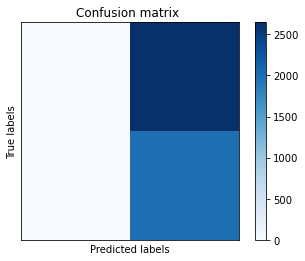

/Users/chandrikasaha/opt/anaconda3/envs/tf_keras/lib/python3.6/site-packages/keras/engine/saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


In [34]:
#Testing masked face vs face
i = 32
test_data_m = ImageDataGenerator(rescale=1./255, validation_split = 0.2)
testp_m = test_data_m.flow_from_directory('MaskFace', target_size=(i,i), batch_size=64, class_mode='binary', subset='validation', seed = 3, shuffle=False)        

t_pred = model_m.predict_generator(testp_m)
print(t_pred)
pred = np.argmax(t_pred, axis=1)
print(pred)
print('Confusion Matrix')
conf = confusion_matrix(testp_m.classes, pred)
print(conf)
print('Classification Report')
target_names = ['0', '1']
f1 = classification_report(testp_m.classes, pred, target_names=target_names)
print(f1)


plt.imshow(conf, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks([], [])
plt.yticks([], [])
plt.title('Confusion matrix ')
plt.colorbar()
plt.show()

f = open("MaskConf.csv",'w')
a = []
for i in range (0,2):
   #print("\n")
   for j in range(0,2):
        a.append(conf[i][j])
       #print(conf[i][j], end='')
        csv.writer(f).writerow(a)
        a = []
f.close()

model_m.save('maskAndFacev_from_face.h5')

<h1> Face and Masked Face Recognition: transfer from face (tuned) </h1>

In [44]:
#loading masked images data
i = 32
train_data = ImageDataGenerator(rescale=1./255, validation_split = 0.2, rotation_range = 10, shear_range = .2 , zoom_range = .1, width_shift_range = .1, height_shift_range = .1)
test_data = ImageDataGenerator(rescale=1./255, validation_split = 0.2)
training_m = train_data.flow_from_directory('MaskFace', target_size=(i,i), batch_size=64, class_mode='binary', subset='training', seed=3)
test_m = test_data.flow_from_directory('MaskFace', target_size=(i,i), batch_size=64, class_mode='binary', subset='validation', seed = 3)

Found 18587 images belonging to 2 classes.
Found 4646 images belonging to 2 classes.


/Users/chandrikasaha/opt/anaconda3/envs/tf_keras/lib/python3.6/site-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


Mask_and_Face_Recog_even_face_v21639096866
Epoch 1/15
291/291 [==============================] - 137s 469ms/step - loss: 0.2339 - accuracy: 0.8777 - val_loss: 0.0839 - val_accuracy: 0.9994
Epoch 2/15
291/291 [==============================] - 132s 455ms/step - loss: 0.0141 - accuracy: 0.9956 - val_loss: 0.0508 - val_accuracy: 1.0000
Epoch 3/15
291/291 [==============================] - 132s 453ms/step - loss: 0.0111 - accuracy: 0.9964 - val_loss: 0.0594 - val_accuracy: 0.9996
Epoch 4/15
291/291 [==============================] - 133s 455ms/step - loss: 0.0078 - accuracy: 0.9975 - val_loss: 0.0459 - val_accuracy: 0.9998
Epoch 5/15
291/291 [==============================] - 127s 437ms/step - loss: 0.0063 - accuracy: 0.9982 - val_loss: 0.0438 - val_accuracy: 0.9996
Epoch 6/15
291/291 [==============================] - 126s 434ms/step - loss: 0.0064 - accuracy: 0.9981 - val_loss: 0.0302 - val_accuracy: 0.9998
Epoch 7/15
291/291 [==============================] - 127s 436ms/step - loss: 0.0

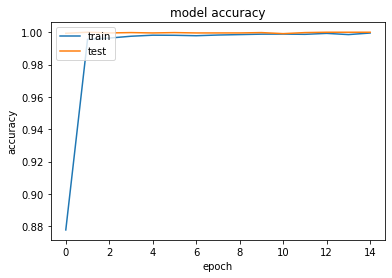

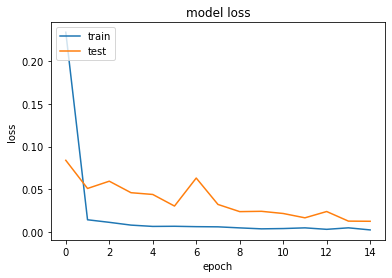

Found 4646 images belonging to 2 classes.
[[0.99779344 0.00220662]
 [0.9875595  0.01244047]
 [0.99886286 0.00113717]
 ...
 [0.03392231 0.9660777 ]
 [0.01391184 0.9860882 ]
 [0.01849221 0.9815077 ]]
[0 0 0 ... 1 1 1]
Confusion Matrix
[[2646    0]
 [   0 2000]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2646
           1       1.00      1.00      1.00      2000

    accuracy                           1.00      4646
   macro avg       1.00      1.00      1.00      4646
weighted avg       1.00      1.00      1.00      4646



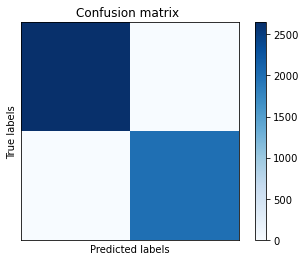

/Users/chandrikasaha/opt/anaconda3/envs/tf_keras/lib/python3.6/site-packages/keras/engine/saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


In [50]:
model_m = load_model('Face.h5')
model_m = keras.models.Sequential(model_m.layers[:-2])

NAME = "Mask_and_Face_Recog_even_face_v2{}".format(int(time.time()))
print(NAME)
tensorboard_m = TensorBoard(log_dir='final_mask_and_face_even_face_v2\{}'.format(NAME), update_freq='epoch')

#add last two model to train the face mask recogniton
model_m.add(Dense(512,activation="relu",use_bias=True))
model_m.add(Dense(units=2, activation="softmax"))

#freez all but the last two layers: transfer learning
count = 0
for layer in model_m.layers[:-2]:
    count = count + 1
    if count%2 == 0:
        model_m.layers[count].trainable = False

#train the model for masked face recogniton
opt= Adam(lr=.0005)
model_m.compile(optimizer=opt, loss = "sparse_categorical_crossentropy", metrics= ["accuracy"])

history_m = History()
model_m.fit_generator(training_m, epochs=15, validation_data=test_m, callbacks=[tensorboard_m,history_m])
#plot_model(model_m, to_file='Mask_Recog.png')
# summarize history for accuracy
plt.plot(history_m.history['accuracy'])
plt.plot(history_m.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_m.history['loss'])
plt.plot(history_m.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

i = 32
test_data_m = ImageDataGenerator(rescale=1./255, validation_split = 0.2)
testp_m = test_data_m.flow_from_directory('MaskFace', target_size=(i,i), batch_size=64, class_mode='binary', subset='validation', seed = 3, shuffle=False)        

t_pred = model_m.predict_generator(testp_m)
print(t_pred)
pred = np.argmax(t_pred, axis=1)
print(pred)
print('Confusion Matrix')
conf = confusion_matrix(testp_m.classes, pred)
print(conf)
print('Classification Report')
target_names = ['0', '1']
f1 = classification_report(testp_m.classes, pred, target_names=target_names)
print(f1)


plt.imshow(conf, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks([], [])
plt.yticks([], [])
plt.title('Confusion matrix ')
plt.colorbar()
plt.show()

f = open("MaskFaceeven.csv",'w')
a = []
for i in range (0,2):
   #print("\n")
   for j in range(0,2):
        a.append(conf[i][j])
       #print(conf[i][j], end='')
        csv.writer(f).writerow(a)
        a = []
f.close()

model_m.save('maskFace_from_face_even.h5')

<h1> Transfer from Faces vs Masked Faces model, last two layer learnable: train on Face vs Noise </h1>

Found 18587 images belonging to 2 classes.
Found 4646 images belonging to 2 classes.


/Users/chandrikasaha/opt/anaconda3/envs/tf_keras/lib/python3.6/site-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


Mask_and_Face_Recog_even_face_v21639102094
Epoch 1/15
291/291 [==============================] - 47s 160ms/step - loss: 0.3715 - accuracy: 0.8231 - val_loss: 0.6796 - val_accuracy: 0.4625
Epoch 2/15
291/291 [==============================] - 45s 155ms/step - loss: 0.1957 - accuracy: 0.9370 - val_loss: 1.4350 - val_accuracy: 0.4305
Epoch 3/15
291/291 [==============================] - 46s 159ms/step - loss: 0.1225 - accuracy: 0.9638 - val_loss: 2.5330 - val_accuracy: 0.4305
Epoch 4/15
291/291 [==============================] - 47s 161ms/step - loss: 0.0880 - accuracy: 0.9755 - val_loss: 3.0889 - val_accuracy: 0.4305
Epoch 5/15
291/291 [==============================] - 45s 156ms/step - loss: 0.0711 - accuracy: 0.9788 - val_loss: 3.7641 - val_accuracy: 0.4305
Epoch 6/15
291/291 [==============================] - 46s 158ms/step - loss: 0.0569 - accuracy: 0.9833 - val_loss: 3.2811 - val_accuracy: 0.4305
Epoch 7/15
291/291 [==============================] - 47s 163ms/step - loss: 0.0591 - a

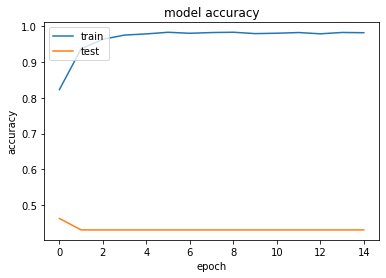

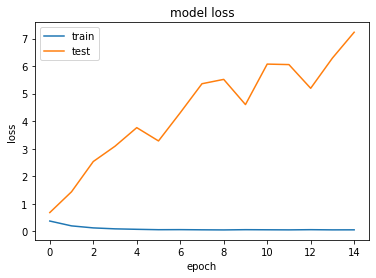

Found 4646 images belonging to 2 classes.
[[9.9999809e-01 1.8859832e-06]
 [9.9999869e-01 1.3274120e-06]
 [9.9999869e-01 1.3063939e-06]
 ...
 [9.9996459e-01 3.5457528e-05]
 [9.9999452e-01 5.4616589e-06]
 [9.9979883e-01 2.0113910e-04]]
[0 0 0 ... 0 0 0]
Confusion Matrix
[[2000    0]
 [2646    0]]
Classification Report
              precision    recall  f1-score   support

           0       0.43      1.00      0.60      2000
           1       0.00      0.00      0.00      2646

    accuracy                           0.43      4646
   macro avg       0.22      0.50      0.30      4646
weighted avg       0.19      0.43      0.26      4646



/Users/chandrikasaha/opt/anaconda3/envs/tf_keras/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/chandrikasaha/opt/anaconda3/envs/tf_keras/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/chandrikasaha/opt/anaconda3/envs/tf_keras/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

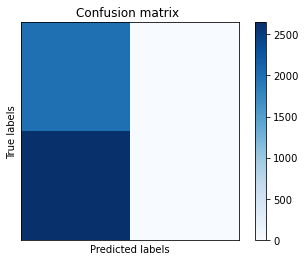

/Users/chandrikasaha/opt/anaconda3/envs/tf_keras/lib/python3.6/site-packages/keras/engine/saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


In [52]:
#loading the data
#image size
i = 32
train_data = ImageDataGenerator(rescale=1./255, validation_split = 0.2, rotation_range = 10, shear_range = .2 , zoom_range = .1, width_shift_range = .1, height_shift_range = .1)
test_data = ImageDataGenerator(rescale=1./255, validation_split = 0.2)
training_m = train_data.flow_from_directory('Faces', target_size=(i,i), batch_size=64, class_mode='binary', subset='training', seed=3)
test_m = test_data.flow_from_directory('Faces', target_size=(i,i), batch_size=64, class_mode='binary', subset='validation', seed = 3)

model_m = load_model('maskFace_from_face_even.h5')
model_m = keras.models.Sequential(model_m.layers[:-2])

NAME = "Mask_and_Face_Recog_even_face_v2{}".format(int(time.time()))
print(NAME)
tensorboard_m = TensorBoard(log_dir='final_mask_and_face_even_face_v2\{}'.format(NAME), update_freq='epoch')

#add last two model to train the face mask recogniton
model_m.add(Dense(512,activation="relu",use_bias=True))
model_m.add(Dense(units=2, activation="softmax"))

#freez all but the last two layers: transfer learning
count = 0
for layer in model_m.layers[:-2]:
    model_m.layers[count].trainable = False
    count = count + 1 

#train the model for masked face recogniton
opt= Adam(lr=.0005)
model_m.compile(optimizer=opt, loss = "sparse_categorical_crossentropy", metrics= ["accuracy"])

history_m = History()
model_m.fit_generator(training_m, epochs=15, validation_data=test_m, callbacks=[tensorboard_m,history_m])
#plot_model(model_m, to_file='Mask_Recog.png')
# summarize history for accuracy
plt.plot(history_m.history['accuracy'])
plt.plot(history_m.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_m.history['loss'])
plt.plot(history_m.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

i = 32
test_data_m = ImageDataGenerator(rescale=1./255, validation_split = 0.2)
testp_m = test_data_m.flow_from_directory('Faces', target_size=(i,i), batch_size=64, class_mode='binary', subset='validation', seed = 3, shuffle=False)        

t_pred = model_m.predict_generator(testp_m)
print(t_pred)
pred = np.argmax(t_pred, axis=1)
print(pred)
print('Confusion Matrix')
conf = confusion_matrix(testp_m.classes, pred)
print(conf)
print('Classification Report')
target_names = ['0', '1']
f1 = classification_report(testp_m.classes, pred, target_names=target_names)
print(f1)


plt.imshow(conf, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks([], [])
plt.yticks([], [])
plt.title('Confusion matrix ')
plt.colorbar()
plt.show()

f = open("MaskFaceeven.csv",'w')
a = []
for i in range (0,2):
   #print("\n")
   for j in range(0,2):
        a.append(conf[i][j])
       #print(conf[i][j], end='')
        csv.writer(f).writerow(a)
        a = []
f.close()

model_m.save('face_from_masked_face_even.h5')

<h1> Transfer from Faces vs Masked Faces model,last two layer learnable: train on Masked vs Noise </h1>

Found 16000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


/Users/chandrikasaha/opt/anaconda3/envs/tf_keras/lib/python3.6/site-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


Mask_and_Face_Recog_even_face_v21639102834
Epoch 1/15
250/250 [==============================] - 118s 471ms/step - loss: 0.0085 - accuracy: 0.9957 - val_loss: 0.0155 - val_accuracy: 0.9998
Epoch 2/15
250/250 [==============================] - 117s 469ms/step - loss: 0.0049 - accuracy: 0.9985 - val_loss: 0.0048 - val_accuracy: 0.9998
Epoch 3/15
250/250 [==============================] - 115s 459ms/step - loss: 0.0039 - accuracy: 0.9990 - val_loss: 0.0035 - val_accuracy: 1.0000
Epoch 4/15
250/250 [==============================] - 113s 451ms/step - loss: 0.0058 - accuracy: 0.9987 - val_loss: 0.0149 - val_accuracy: 0.9998
Epoch 5/15
250/250 [==============================] - 115s 458ms/step - loss: 0.0030 - accuracy: 0.9991 - val_loss: 0.0052 - val_accuracy: 0.9998
Epoch 6/15
250/250 [==============================] - 116s 464ms/step - loss: 0.0042 - accuracy: 0.9987 - val_loss: 0.0133 - val_accuracy: 0.9998
Epoch 7/15
250/250 [==============================] - 115s 461ms/step - loss: 0.0

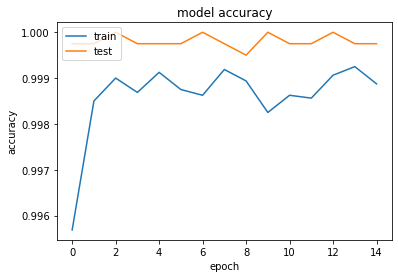

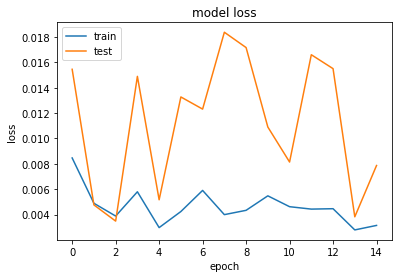

Found 4000 images belonging to 2 classes.
[[0.9911582  0.00884181]
 [0.9976884  0.00231164]
 [0.99764144 0.00235862]
 ...
 [0.01597006 0.9840299 ]
 [0.00410638 0.9958936 ]
 [0.00639916 0.9936008 ]]
[0 0 0 ... 1 1 1]
Confusion Matrix
[[2000    0]
 [   1 1999]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2000
           1       1.00      1.00      1.00      2000

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



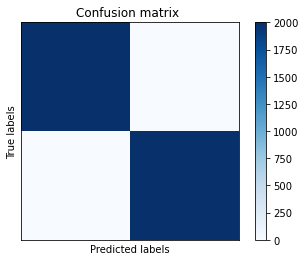

/Users/chandrikasaha/opt/anaconda3/envs/tf_keras/lib/python3.6/site-packages/keras/engine/saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


In [54]:
#loading the data
#image size
i = 32
train_data = ImageDataGenerator(rescale=1./255, validation_split = 0.2, rotation_range = 10, shear_range = .2 , zoom_range = .1, width_shift_range = .1, height_shift_range = .1)
test_data = ImageDataGenerator(rescale=1./255, validation_split = 0.2)
training_m = train_data.flow_from_directory('CMFD', target_size=(i,i), batch_size=64, class_mode='binary', subset='training', seed=3)
test_m = test_data.flow_from_directory('CMFD', target_size=(i,i), batch_size=64, class_mode='binary', subset='validation', seed = 3)


model_m = load_model('maskFace_from_face_even.h5')
model_m = keras.models.Sequential(model_m.layers[:-2])

NAME = "Mask_and_Face_Recog_even_face_v2{}".format(int(time.time()))
print(NAME)
tensorboard_m = TensorBoard(log_dir='final_mask_and_face_even_face_v2\{}'.format(NAME), update_freq='epoch')

#add last two model to train the face mask recogniton
model_m.add(Dense(512,activation="relu",use_bias=True))
model_m.add(Dense(units=2, activation="softmax"))

#freez all but the last two layers: transfer learning
count = 0
for layer in model_m.layers[:-2]:
    model_m.layers[count].trainable = False
    count = count + 1

#train the model for masked face recogniton
opt= Adam(lr=.0005)
model_m.compile(optimizer=opt, loss = "sparse_categorical_crossentropy", metrics= ["accuracy"])

history_m = History()
model_m.fit_generator(training_m, epochs=15, validation_data=test_m, callbacks=[tensorboard_m,history_m])
#plot_model(model_m, to_file='Mask_Recog.png')
# summarize history for accuracy
plt.plot(history_m.history['accuracy'])
plt.plot(history_m.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_m.history['loss'])
plt.plot(history_m.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

i = 32
test_data_m = ImageDataGenerator(rescale=1./255, validation_split = 0.2)
testp_m = test_data_m.flow_from_directory('CMFD', target_size=(i,i), batch_size=64, class_mode='binary', subset='validation', seed = 3, shuffle=False)        

t_pred = model_m.predict_generator(testp_m)
print(t_pred)
pred = np.argmax(t_pred, axis=1)
print(pred)
print('Confusion Matrix')
conf = confusion_matrix(testp_m.classes, pred)
print(conf)
print('Classification Report')
target_names = ['0', '1']
f1 = classification_report(testp_m.classes, pred, target_names=target_names)
print(f1)


plt.imshow(conf, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks([], [])
plt.yticks([], [])
plt.title('Confusion matrix ')
plt.colorbar()
plt.show()

f = open("MaskFaceeven.csv",'w')
a = []
for i in range (0,2):
   #print("\n")
   for j in range(0,2):
        a.append(conf[i][j])
       #print(conf[i][j], end='')
        csv.writer(f).writerow(a)
        a = []
f.close()

model_m.save('mask_from_maskface_even.h5')

<h1> Face Identification </h1>

Found 4646 images belonging to 2 classes.


/Users/chandrikasaha/opt/anaconda3/envs/tf_keras/lib/python3.6/site-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


[0 0 0 ... 1 1 1]
Confusion Matrix
[[2646    0]
 [   0 2000]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2646
           1       1.00      1.00      1.00      2000

    accuracy                           1.00      4646
   macro avg       1.00      1.00      1.00      4646
weighted avg       1.00      1.00      1.00      4646



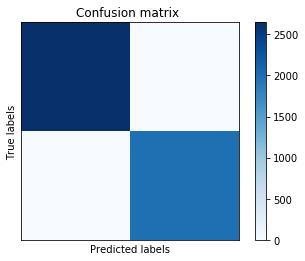

In [4]:
#Classifying mask va non-masked faces
#Storing the non-masked faces to later identify them

from keras.models import load_model
i = 32
test_data_m = ImageDataGenerator(rescale=1./255, validation_split = 0.2)
testp_m = test_data_m.flow_from_directory('MaskFace', target_size=(i,i), batch_size=64, class_mode='binary', subset='validation', seed = 3, shuffle=False)        

model = load_model('maskFace_from_face_even.h5')

index = 0
image_names = []
while (index < 4646):
    image, label = testp_m._get_batches_of_transformed_samples(np.array([index]))
    image_names.append(testp_m.filenames[index])
    index = index + 1

t_pred = model.predict_generator(testp_m)
pred = np.argmax(t_pred, axis=1)
print(pred)

index = 0
non_masked_faces = []
while(index < 4646):
    if(pred[index] == 0):
        non_masked_faces.append(image_names[index])
    index = index + 1
    
    
print('Confusion Matrix')
conf = confusion_matrix(testp_m.classes, pred)
print(conf)
print('Classification Report')
target_names = ['0', '1']
f1 = classification_report(testp_m.classes, pred, target_names=target_names)
print(f1)


plt.imshow(conf, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks([], [])
plt.yticks([], [])
plt.title('Confusion matrix ')
plt.colorbar()
plt.show()

f = open("MaskConf_newmodel.csv",'w')
a = []
for i in range (0,2):
   #print("\n")
   for j in range(0,2):
        a.append(conf[i][j])
       #print(conf[i][j], end='')
        csv.writer(f).writerow(a)
        a = []
f.close()


In [6]:
import tensorflow as tf
#defining the triplet loss function
def triplet_loss(y_true, y_pred, alpha = 0.2):    
    anchor, positive, negative = y_pred[0], y_pred[1], y_pred[2]
    
    ### START CODE HERE ### (≈ 4 lines)
    # Step 1: Compute the (encoding) distance between the anchor and the positive, you will need to sum over axis=-1
    pos_dist = tf.reduce_sum(tf.square(anchor - positive), axis = -1)
    # Step 2: Compute the (encoding) distance between the anchor and the negative, you will need to sum over axis=-1
    neg_dist = tf.reduce_sum(tf.square(anchor - negative), axis = -1)
    # Step 3: subtract the two previous distances and add alpha.
    basic_loss = pos_dist- neg_dist + alpha
    # Step 4: Take the maximum of basic_loss and 0.0. Sum over the training examples.
    loss = tf.reduce_sum(tf.maximum(basic_loss, 0.0))
    ### END CODE HERE ###
    
    return loss

In [7]:
#loadng the trained model
model = load_model('maskFace_from_face_even.h5')
model = keras.models.Sequential(model.layers[:-3])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 8, 8, 64)         

/Users/chandrikasaha/opt/anaconda3/envs/tf_keras/lib/python3.6/site-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [8]:
opt= Adam(lr=.0005)
model.compile(optimizer=opt, loss = triplet_loss, metrics= ["accuracy"])

In [13]:
import cv2
def img_to_encoding(path, model):
    img = cv2.imread(path, 1)
    #img = img1[...,::-1]
    dim = (32, 32)
    # resize image
    if(img.shape != (32, 32, 3)):
        img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    x_train = np.array([img])
    embedding = model.predict(x_train)
    return embedding

In [14]:
#getting the paths for all our database images
import os
all_images_embeded = {}
all_files = []
dir_list = []
index = 0
for root, dirs, files in os.walk('database'):
    dir_list = dirs
    if index == 0:
        break
for root, dirs, files in os.walk('database'):
    if files:
            all_files.append(files[0])

In [16]:
#create image embeddings for all the database images
index = 0
all_images_embeded = {}
for dirs in dir_list:
    path = '//Users//chandrikasaha//Desktop//MLproject//ML//database//' + str(dirs) +'//'+ str(all_files[index+1])
    print(path)
    all_images_embeded[dirs] = img_to_encoding(path, model)
    index = index + 1

//Users//chandrikasaha//Desktop//MLproject//ML//database//German_Khan//German_Khan_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Stefano_Gabbana//Stefano_Gabbana_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Dragan_Covic//Dragan_Covic_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Jeff_Hornacek//Jeff_Hornacek_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Sureyya_Ayhan//Sureyya_Ayhan_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Deb_Santos//Deb_Santos_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Bob_Newhart//Bob_Newhart_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Wang_Hailan//Wang_Hailan_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Paul_McNulty//Paul_McNulty_0002.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Jimmy_Iovine//Jimmy_Iovine_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Cl

//Users//chandrikasaha//Desktop//MLproject//ML//database//Nicolas_Massu//Nicolas_Massu_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Kaisser_Bazan//Kaisser_Bazan_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Bryan_Murray//Bryan_Murray_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Francois_Ozon//Francois_Ozon_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Mathias_Reichhold//Mathias_Reichhold_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Whoopi_Goldberg//Whoopi_Goldberg_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Bill_Cartwright//Bill_Cartwright_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Victor_Garber//Victor_Garber_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Jeane_Kirkpatrick//Jeane_Kirkpatrick_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Sue_Grafton//Sue_Grafton_0001.jpg
//Users//chandrikasaha

//Users//chandrikasaha//Desktop//MLproject//ML//database//Elena_Likhovtseva//Elena_Likhovtseva_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Paul_Ebert//Paul_Ebert_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Anita_DeFrantz//Anita_DeFrantz_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Lee_Nam-shin//Lee_Nam-shin_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Crispin_Glover//Crispin_Glover_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Kevin_Marshall//Kevin_Marshall_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Sven_Ottke//Sven_Ottke_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Raf_Vallone//Raf_Vallone_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Nick_Reilly//Nick_Reilly_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Bob_Huggins//Bob_Huggins_0003.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//data

//Users//chandrikasaha//Desktop//MLproject//ML//database//Dave_Tucker//Dave_Tucker_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Brandon_Larson//Brandon_Larson_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Phoenix_Chang//Phoenix_Chang_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Penelope_Ann_Miller//Penelope_Ann_Miller_0002.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Natalie_Juniardi//Natalie_Juniardi_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Ted_Maher//Ted_Maher_0002.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Noor_Mohammed//Noor_Mohammed_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Walt_Harris//Walt_Harris_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Olivera_Labus//Olivera_Labus_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Stephen_Covey//Stephen_Covey_0001.jpg
//Users//chandrikasaha//Desktop//MLp

//Users//chandrikasaha//Desktop//MLproject//ML//database//Sanjay_Gupta//Sanjay_Gupta_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Gary_Locke//Gary_Locke_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Sinead_OConnor//Sinead_OConnor_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//James_W_Kennedy//James_W_Kennedy_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Kurt_Suzuki//Kurt_Suzuki_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Frederick_Madden//Frederick_Madden_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Priscilla_Owen//Priscilla_Owen_0002.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Malcolm_Jamal_Warner//Malcolm_Jamal_Warner_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Naoto_Kan//Naoto_Kan_0003.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Sue_Guevara//Sue_Guevara_0001.jpg
//Users//chandrikasaha//Desktop//MLp

//Users//chandrikasaha//Desktop//MLproject//ML//database//Doug_Christie//Doug_Christie_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Larry_Harris//Larry_Harris_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Lin_Yung_Hsi//Lin_Yung_Hsi_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Abdullah_al-Attiyah//Abdullah_al-Attiyah_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Vladimir_Ustinov//Vladimir_Ustinov_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Dustan_Mohr//Dustan_Mohr_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Farouk_Kaddoumi//Farouk_Kaddoumi_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Shigeru_Ishiba//Shigeru_Ishiba_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Peter_Sejna//Peter_Sejna_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Robert_Tyrrell//Robert_Tyrrell_0001.jpg
//Users//chandrikasaha//De

//Users//chandrikasaha//Desktop//MLproject//ML//database//Joaquin_Phoenix//Joaquin_Phoenix_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Magda_Kertasz//Magda_Kertasz_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Mel_Brooks//Mel_Brooks_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Todd_MacCulloch//Todd_MacCulloch_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Keiko_Sofia_Fujimori//Keiko_Sofia_Fujimori_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Jeffrey_Archer//Jeffrey_Archer_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Richard_Dreyfuss//Richard_Dreyfuss_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Frank_Shea//Frank_Shea_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Dan_Monson//Dan_Monson_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Ruth_Stubbs//Ruth_Stubbs_0001.jpg
//Users//chandrikasaha//Desktop/

//Users//chandrikasaha//Desktop//MLproject//ML//database//Romain_Duris//Romain_Duris_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Mohammad_Khatami//Mohammad_Khatami_0002.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Peter_Caruana//Peter_Caruana_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Lynn_Abraham//Lynn_Abraham_0002.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Kelly_Osbourne//Kelly_Osbourne_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Condoleezza_Rice//Condoleezza_Rice_0007.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Julia_Tymoshenko//Julia_Tymoshenko_0003.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Eminem//Eminem_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Tom_Watson//Tom_Watson_0003.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Thomas_Klestil//Thomas_Klestil_0001.jpg
//Users//chandrikasaha//Desktop//MLproject

//Users//chandrikasaha//Desktop//MLproject//ML//database//Mark_Salter//Mark_Salter_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Jimmy_Carter//Jimmy_Carter_0008.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Wei_Wu//Wei_Wu_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//John_Blaney//John_Blaney_0002.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Dave_Lewis//Dave_Lewis_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Hiroki_Gomi//Hiroki_Gomi_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Richard_Myers//Richard_Myers_0018.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//MC_Hammer//MC_Hammer_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//John_Leguizamo//John_Leguizamo_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Sonja_Kesselschlager//Sonja_Kesselschlager_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Jessica_

//Users//chandrikasaha//Desktop//MLproject//ML//database//Herbert_Haupt//Herbert_Haupt_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Anna_Chicherova//Anna_Chicherova_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Bernadette_Peters//Bernadette_Peters_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Sue_Slavec//Sue_Slavec_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Lloyd_Ward//Lloyd_Ward_0002.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Lim_Dong-won//Lim_Dong-won_0002.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Chris_Claiborne//Chris_Claiborne_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Catherine_Woodard//Catherine_Woodard_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Ian_Campbell//Ian_Campbell_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Dave_McGinnis//Dave_McGinnis_0001.jpg
//Users//chandrikasaha//Desktop/

//Users//chandrikasaha//Desktop//MLproject//ML//database//Jamir_Miller//Jamir_Miller_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Milo_Maestrecampo//Milo_Maestrecampo_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Tanya_Lindenmuth//Tanya_Lindenmuth_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Peter_Schultz//Peter_Schultz_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Javier_Solana//Javier_Solana_0009.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//William_Ford_Jr//William_Ford_Jr_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Liu_Xiaoqing//Liu_Xiaoqing_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Suzanne_Torrance//Suzanne_Torrance_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Imran_Khan//Imran_Khan_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Igor_Ivanov//Igor_Ivanov_0006.jpg
//Users//chandrikasaha//Deskto

//Users//chandrikasaha//Desktop//MLproject//ML//database//Mike_Flanagan//Mike_Flanagan_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Fernando_Hierro//Fernando_Hierro_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Jean-David_Levitte//Jean-David_Levitte_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Antje_Buschschulte//Antje_Buschschulte_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Elena_de_Chavez//Elena_de_Chavez_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Dino_de_Laurentis//Dino_de_Laurentis_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Tatiana_Gratcheva//Tatiana_Gratcheva_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Queen_Beatrix//Queen_Beatrix_0004.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Bill_Parcells//Bill_Parcells_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Carlos_Mesa//Carlos_Mesa_0001.jpg


//Users//chandrikasaha//Desktop//MLproject//ML//database//Patti_Smith//Patti_Smith_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Perry_Farrell//Perry_Farrell_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Joseph_Estrada//Joseph_Estrada_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Eurico_Guterres//Eurico_Guterres_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Patsy_Hardy//Patsy_Hardy_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Vanessa_Williams//Vanessa_Williams_0003.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Gretchen_Mol//Gretchen_Mol_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Rainer_Gut//Rainer_Gut_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Emilio_Botin//Emilio_Botin_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Raymond_Odierno//Raymond_Odierno_0001.jpg
//Users//chandrikasaha//Desktop//MLproject

//Users//chandrikasaha//Desktop//MLproject//ML//database//Brian_StPierre//Brian_StPierre_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Guillaume_Soro//Guillaume_Soro_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Denise_Johnson//Denise_Johnson_0002.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Justine_Henin//Justine_Henin_0003.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Rod_Stewart//Rod_Stewart_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Edward_Belvin//Edward_Belvin_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Joel_Gallen//Joel_Gallen_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Lubomir_Zaoralek//Lubomir_Zaoralek_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Ahmed_Ahmed//Ahmed_Ahmed_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Kristin_Scott//Kristin_Scott_0001.jpg
//Users//chandrikasaha//Desktop//MLproje

//Users//chandrikasaha//Desktop//MLproject//ML//database//Helen_Darling//Helen_Darling_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Steffi_Graf//Steffi_Graf_0005.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Linda_Baboolal//Linda_Baboolal_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Craig_Morgan//Craig_Morgan_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Emma_Thompson//Emma_Thompson_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Edward_Seaga//Edward_Seaga_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Eric_Christian_Olsen//Eric_Christian_Olsen_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Jennifer_Thompson//Jennifer_Thompson_0002.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Cheryl_Little//Cheryl_Little_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Ryan_Nyquist//Ryan_Nyquist_0001.jpg
//Users//chandrikasaha//De

//Users//chandrikasaha//Desktop//MLproject//ML//database//Jerry_Jones//Jerry_Jones_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Nicoletta_Braschi//Nicoletta_Braschi_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Steve_Lavin//Steve_Lavin_0006.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Natalia_Motuziuk//Natalia_Motuziuk_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Vladimir_Putin//Vladimir_Putin_0016.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Jack_Grubman//Jack_Grubman_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Paul_Lo_Duca//Paul_Lo_Duca_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Jennifer_Lopez//Jennifer_Lopez_0011.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Rob_Morrow//Rob_Morrow_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Julie_Gerberding//Julie_Gerberding_0014.jpg
//Users//chandrikasaha//Desktop//M

//Users//chandrikasaha//Desktop//MLproject//ML//database//Tony_Fernandes//Tony_Fernandes_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Ronnie_Jagday//Ronnie_Jagday_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Nestor_Santillan//Nestor_Santillan_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Juergen_Chrobog//Juergen_Chrobog_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Vassilis_Xiros//Vassilis_Xiros_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Muhammad_Ali//Muhammad_Ali_0006.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Karol_Kucera//Karol_Kucera_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Charlton_Heston//Charlton_Heston_0006.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Freddy_Garcia//Freddy_Garcia_0002.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//David_Caraway//David_Caraway_0001.jpg
//Users//chandrikasaha//De

//Users//chandrikasaha//Desktop//MLproject//ML//database//Aron_Ralston//Aron_Ralston_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Jose_Jose//Jose_Jose_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Gene_Hackman//Gene_Hackman_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Viktor_Yushchenko//Viktor_Yushchenko_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Martin_Gecht//Martin_Gecht_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Tina_Fey//Tina_Fey_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Aaron_Sorkin//Aaron_Sorkin_0002.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Dianne_Feinstein//Dianne_Feinstein_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//William_Hyde//William_Hyde_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Mary_McCarty//Mary_McCarty_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database

//Users//chandrikasaha//Desktop//MLproject//ML//database//Christopher_Russell//Christopher_Russell_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Rebecca_Romijn-Stamos//Rebecca_Romijn-Stamos_0003.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//David_Heyman//David_Heyman_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Antonio_Bernardo//Antonio_Bernardo_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Shawn_Marion//Shawn_Marion_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Ron_Gonzales//Ron_Gonzales_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Zhang_Wenkang//Zhang_Wenkang_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Michelle_Rodriguez//Michelle_Rodriguez_0002.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Jeb_Bush//Jeb_Bush_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//David_Kelly//David_Kelly_0001.jpg
//Users//chandri

//Users//chandrikasaha//Desktop//MLproject//ML//database//Hassan_Nasrallah//Hassan_Nasrallah_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Khader_Rashid_Rahim//Khader_Rashid_Rahim_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Georgina_Papin//Georgina_Papin_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//George_Harrison//George_Harrison_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Barbara_Becker//Barbara_Becker_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Rudolph_Holton//Rudolph_Holton_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Robinson_Stevenin//Robinson_Stevenin_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Larry_Beinfest//Larry_Beinfest_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Stephanie_Cohen_Aloro//Stephanie_Cohen_Aloro_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Paul_Coppin//Paul_Coppin

//Users//chandrikasaha//Desktop//MLproject//ML//database//Ellen_DeGeneres//Ellen_DeGeneres_0002.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Laura_Schlessinger//Laura_Schlessinger_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Matt_Siebrandt//Matt_Siebrandt_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Celso_Lafer//Celso_Lafer_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Scott_Sullivan//Scott_Sullivan_0002.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Cristina_Fernandez//Cristina_Fernandez_0002.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Vanessa_Incontrada//Vanessa_Incontrada_0004.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Kenenisa_Bekele//Kenenisa_Bekele_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Dewayne_White//Dewayne_White_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Teruaki_Masumoto//Teruaki_Masumoto_0001.

//Users//chandrikasaha//Desktop//MLproject//ML//database//Alfredo_Moreno//Alfredo_Moreno_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Aaron_Guiel//Aaron_Guiel_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Micheal_Jourdain_Jr//Micheal_Jourdain_Jr_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Jude_Law//Jude_Law_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Vijay_Nambiar//Vijay_Nambiar_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Leo_Ramirez//Leo_Ramirez_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Richard_Cohen//Richard_Cohen_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Richard_Sterner//Richard_Sterner_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Tamara_Mowry//Tamara_Mowry_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Mary_Maddux//Mary_Maddux_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML

//Users//chandrikasaha//Desktop//MLproject//ML//database//Lee_Tae-sik//Lee_Tae-sik_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Coco_dEste//Coco_dEste_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Sarah_Weddington//Sarah_Weddington_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Marty_Mornhinweg//Marty_Mornhinweg_0002.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Michelle_Chiklis//Michelle_Chiklis_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Lorraine_Fenton//Lorraine_Fenton_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Carroll_Weimer//Carroll_Weimer_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Sohail_Abbas//Sohail_Abbas_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Mark_Broxmeyer//Mark_Broxmeyer_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Martin_Keown//Martin_Keown_0001.jpg
//Users//chandrikasaha//Desk

//Users//chandrikasaha//Desktop//MLproject//ML//database//John_Franco//John_Franco_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Tom_Kelly//Tom_Kelly_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Alex_Wallau//Alex_Wallau_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Hideki_Sato//Hideki_Sato_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Robbie_Fowler//Robbie_Fowler_0002.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Beecher_Ray_Kirby//Beecher_Ray_Kirby_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Robert_Kocharian//Robert_Kocharian_0005.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Ruth_Dreifuss//Ruth_Dreifuss_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Chen_Kaige//Chen_Kaige_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Jim_Wessling//Jim_Wessling_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//databa

//Users//chandrikasaha//Desktop//MLproject//ML//database//Steve_Ballmer//Steve_Ballmer_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Chistian_Stahl//Chistian_Stahl_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Camille_Colvin//Camille_Colvin_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Judith_Nathan//Judith_Nathan_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Anthony_Carter//Anthony_Carter_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Joy_Bryant//Joy_Bryant_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Stephen_Push//Stephen_Push_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Tia_Mowry//Tia_Mowry_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Abraham_Foxman//Abraham_Foxman_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Rick_Romley//Rick_Romley_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//data

//Users//chandrikasaha//Desktop//MLproject//ML//database//Lili_Taylor//Lili_Taylor_0002.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Patty_Sheehan//Patty_Sheehan_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Mother_Teresa//Mother_Teresa_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Douglas_Paal//Douglas_Paal_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Mehdi_Baala//Mehdi_Baala_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Wallace_Capel//Wallace_Capel_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Suzanne_Gaudet//Suzanne_Gaudet_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Jim_Tressel//Jim_Tressel_0004.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Robert_Blake//Robert_Blake_0003.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Abdullah_Nasseef//Abdullah_Nasseef_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//

//Users//chandrikasaha//Desktop//MLproject//ML//database//Monica_Seles//Monica_Seles_0003.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Atiabet_Ijan_Amabel//Atiabet_Ijan_Amabel_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Adam_Herbert//Adam_Herbert_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Victor_Hanescu//Victor_Hanescu_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//David_Millar//David_Millar_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Richard_Tubb//Richard_Tubb_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Perry_Compton//Perry_Compton_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Kevin_Harvick//Kevin_Harvick_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Faisal_Saleh_Hayat//Faisal_Saleh_Hayat_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Barry_Ford//Barry_Ford_0001.jpg
//Users//chandrikasaha//Deskto

//Users//chandrikasaha//Desktop//MLproject//ML//database//Keith_Fotta//Keith_Fotta_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Tim_Curry//Tim_Curry_0002.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Qusai_Hussein//Qusai_Hussein_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Anthony_Garotinho//Anthony_Garotinho_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Larry_Ralston//Larry_Ralston_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Jim_Fassel//Jim_Fassel_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Joanne_Duquette//Joanne_Duquette_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Kim_Yun-kyu//Kim_Yun-kyu_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Luiz_Felipe_Scolari//Luiz_Felipe_Scolari_0002.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Phil_Jackson//Phil_Jackson_0001.jpg
//Users//chandrikasaha//Desktop//MLproje

//Users//chandrikasaha//Desktop//MLproject//ML//database//Richard_Gephardt//Richard_Gephardt_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Phil_Morris//Phil_Morris_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Miguel_Cotto//Miguel_Cotto_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Kitin_Munoz//Kitin_Munoz_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Susan_Sarandon//Susan_Sarandon_0003.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Nadine_Vinzens//Nadine_Vinzens_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Emma_Watson//Emma_Watson_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Tom_Ridge//Tom_Ridge_0010.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Robert_DeFraites//Robert_DeFraites_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Ronald_Perelman//Ronald_Perelman_0001.jpg
//Users//chandrikasaha//Desktop//MLproject

//Users//chandrikasaha//Desktop//MLproject//ML//database//David_Siegel//David_Siegel_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Armand_Sargen//Armand_Sargen_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Greg_Hodge//Greg_Hodge_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Mohamed_ElBaradei//Mohamed_ElBaradei_0008.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Ben_Braun//Ben_Braun_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Michael_Sheehan//Michael_Sheehan_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Clay_Aiken//Clay_Aiken_0006.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Jim_Bunning//Jim_Bunning_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Peter_Bacanovic//Peter_Bacanovic_0002.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Martin_McCauley//Martin_McCauley_0002.jpg
//Users//chandrikasaha//Desktop//MLproject//ML

//Users//chandrikasaha//Desktop//MLproject//ML//database//Mike_Stefanik//Mike_Stefanik_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Yusaku_Miyazato//Yusaku_Miyazato_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Darla_Moore//Darla_Moore_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Mark_McClellan//Mark_McClellan_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Li_Ruihuan//Li_Ruihuan_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Mauricio_Pochetino//Mauricio_Pochetino_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Kobe_Bryant//Kobe_Bryant_0002.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//George_Plimpton//George_Plimpton_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//George_Brumley_III//George_Brumley_III_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Shigeo_Nagashima//Shigeo_Nagashima_0001.jpg
//Users//chandrika

//Users//chandrikasaha//Desktop//MLproject//ML//database//Ana_Sebastiao//Ana_Sebastiao_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Helo_Pinheiro//Helo_Pinheiro_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Jeanette_Gray//Jeanette_Gray_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Michael_Haneke//Michael_Haneke_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Marsha_Sharp//Marsha_Sharp_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Mariah_Carey//Mariah_Carey_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//David_Dodge//David_Dodge_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Portia_de_Rossi//Portia_de_Rossi_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Elvis_Costello//Elvis_Costello_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Bill_Duffey//Bill_Duffey_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//

//Users//chandrikasaha//Desktop//MLproject//ML//database//Dominique_Perben//Dominique_Perben_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Peter_Rasch//Peter_Rasch_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Akbar_Hashemi_Rafsanjani//Akbar_Hashemi_Rafsanjani_0002.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Conan_OBrien//Conan_OBrien_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//George_P_Bush//George_P_Bush_0002.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Richard_Krajicek//Richard_Krajicek_0003.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Tyler_Hamilton//Tyler_Hamilton_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Sarah_Michelle_Gellar//Sarah_Michelle_Gellar_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Askar_Akayev//Askar_Akayev_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Daryl_Parks//Daryl_Parks_0001.jpg


//Users//chandrikasaha//Desktop//MLproject//ML//database//Nick_Turner//Nick_Turner_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Shawn_Bradley//Shawn_Bradley_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Yale_Kamisar//Yale_Kamisar_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Christian_Gimenez//Christian_Gimenez_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Martin_Hoellwarth//Martin_Hoellwarth_0002.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Mike_Webster//Mike_Webster_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Rubens_Barrichello//Rubens_Barrichello_0008.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Gary_Coleman//Gary_Coleman_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Heidi_Klum//Heidi_Klum_0003.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Esther_Macklin//Esther_Macklin_0001.jpg
//Users//chandrikasaha//Desk

//Users//chandrikasaha//Desktop//MLproject//ML//database//Chris_Pronger//Chris_Pronger_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Mohammad_Aktar//Mohammad_Aktar_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Horacio_Julio_Pina//Horacio_Julio_Pina_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Steve_Redgrave//Steve_Redgrave_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Julien_Varlet//Julien_Varlet_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Maria_Guida//Maria_Guida_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Marc_Grossman//Marc_Grossman_0002.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Stanley_Nelson//Stanley_Nelson_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Catherine_Ndereba//Catherine_Ndereba_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Joe_Paterno//Joe_Paterno_0001.jpg
//Users//chandrikasaha//

//Users//chandrikasaha//Desktop//MLproject//ML//database//Mladen_Naletilic//Mladen_Naletilic_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Tassos_Papadopoulos//Tassos_Papadopoulos_0003.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Daniel_Radcliffe//Daniel_Radcliffe_0002.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Tim_Salmon//Tim_Salmon_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Orlando_Bloom//Orlando_Bloom_0003.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Aaron_Patterson//Aaron_Patterson_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Gary_Sayler//Gary_Sayler_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Brandon_Webb//Brandon_Webb_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//David_Dewayne_Williams//David_Dewayne_Williams_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Lauren_Hutton//Lauren_Hutton_0001.jpg
//User

//Users//chandrikasaha//Desktop//MLproject//ML//database//Martin_Luther_King_III//Martin_Luther_King_III_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Mahmoud_Al_Zhar//Mahmoud_Al_Zhar_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Miguel_Hakim//Miguel_Hakim_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Tina_Conner//Tina_Conner_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Valentina_Cervi//Valentina_Cervi_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Brian_Olson//Brian_Olson_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Fernando_Gonzalez//Fernando_Gonzalez_0007.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Tommy_Maddox//Tommy_Maddox_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Grant_Rossenmeyer//Grant_Rossenmeyer_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Nova_Esther_Guthrie//Nova_Esther_Guthrie_0001.jp

//Users//chandrikasaha//Desktop//MLproject//ML//database//Alfredo_di_Stefano//Alfredo_di_Stefano_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Leisel_Jones//Leisel_Jones_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Jiri_Novak//Jiri_Novak_0002.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Jaouad_Gharib//Jaouad_Gharib_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Arthur_Johnson//Arthur_Johnson_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Ashley_Judd//Ashley_Judd_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Peter_Hollingworth//Peter_Hollingworth_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Susie_Castillo//Susie_Castillo_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Marc_Anthony//Marc_Anthony_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Mark_Schweiker//Mark_Schweiker_0002.jpg
//Users//chandrikasaha//Desk

//Users//chandrikasaha//Desktop//MLproject//ML//database//Julianna_Margulies//Julianna_Margulies_0002.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//James_Comey//James_Comey_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Martha_Smith//Martha_Smith_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Larry_Johnson//Larry_Johnson_0002.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Alfred_Ford//Alfred_Ford_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Thomas_Bjorn//Thomas_Bjorn_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Kultida_Woods//Kultida_Woods_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Keith_Van_Horn//Keith_Van_Horn_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Carlos_Alberto_Parreira//Carlos_Alberto_Parreira_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Bill_Simon//Bill_Simon_0009.jpg
//Users//chandrikasaha//De

//Users//chandrikasaha//Desktop//MLproject//ML//database//Sandy_Smith//Sandy_Smith_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Nino_DAngelo//Nino_DAngelo_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Stockard_Channing//Stockard_Channing_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Mireille_Jospin-Dandieu//Mireille_Jospin-Dandieu_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Alastair_Campbell//Alastair_Campbell_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Ricky_Ray//Ricky_Ray_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//James_Coburn//James_Coburn_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Michael_Kors//Michael_Kors_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Paul_Bettany//Paul_Bettany_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Janez_Drnovsek//Janez_Drnovsek_0001.jpg
//Users//chandrikasaha

//Users//chandrikasaha//Desktop//MLproject//ML//database//Chin-Hui_Tsao//Chin-Hui_Tsao_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//John_Geoghan//John_Geoghan_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//King_Bhumibol_Adulyadej//King_Bhumibol_Adulyadej_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Frank_Keating//Frank_Keating_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Zaini_Abdullah//Zaini_Abdullah_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Gao_Qiang//Gao_Qiang_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Yasushi_Akashi//Yasushi_Akashi_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Joan_Laporta//Joan_Laporta_0009.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Paula_Abdul//Paula_Abdul_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Anne_Heche//Anne_Heche_0001.jpg
//Users//chandrikasaha//Desktop//MLpro

//Users//chandrikasaha//Desktop//MLproject//ML//database//AJ_Cook//AJ_Cook_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Richard_Barry//Richard_Barry_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Toni_Braxton//Toni_Braxton_0002.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Johnny_Unitas//Johnny_Unitas_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Jason_Jennings//Jason_Jennings_0002.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//James_Hakett//James_Hakett_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Robert_Stack//Robert_Stack_0002.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Mike_OConnell//Mike_OConnell_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Aaron_Tippin//Aaron_Tippin_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Roberta_Combs//Roberta_Combs_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//

//Users//chandrikasaha//Desktop//MLproject//ML//database//Syed_Abdul_Rahman_Geelani//Syed_Abdul_Rahman_Geelani_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Felipe_Fernandez//Felipe_Fernandez_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Stipe_Mesic//Stipe_Mesic_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Joaquin_Sanchez//Joaquin_Sanchez_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Robert_Marshall//Robert_Marshall_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Tara_VanDerveer//Tara_VanDerveer_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Mike_Carona//Mike_Carona_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Claudia_Schiffer//Claudia_Schiffer_0003.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Jamie_Villafane//Jamie_Villafane_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Viola_Davis//Viola_Davis_0001.jpg


//Users//chandrikasaha//Desktop//MLproject//ML//database//Takeshi_Kitano//Takeshi_Kitano_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Kim_Hong-gul//Kim_Hong-gul_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Andy_Rooney//Andy_Rooney_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Chris_Gratton//Chris_Gratton_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Angela_Merkel//Angela_Merkel_0005.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Eric_Snow//Eric_Snow_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Eric_Bana//Eric_Bana_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//John_Rigas//John_Rigas_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Juliette_Binoche//Juliette_Binoche_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Barbora_Strycova//Barbora_Strycova_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//databa

//Users//chandrikasaha//Desktop//MLproject//ML//database//Jim_Nochols//Jim_Nochols_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Charles_Chandler_IV//Charles_Chandler_IV_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//John_Prescott//John_Prescott_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Lord_Hutton//Lord_Hutton_0002.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Ken_Kutaragi//Ken_Kutaragi_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Patti_Labelle//Patti_Labelle_0002.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Didier_Defago//Didier_Defago_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Halle_Berry//Halle_Berry_0014.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Simona_Hradil//Simona_Hradil_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//James_Ballenger//James_Ballenger_0001.jpg
//Users//chandrikasaha//Desktop//MLpro

//Users//chandrikasaha//Desktop//MLproject//ML//database//Pete_Beaudrault//Pete_Beaudrault_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Gloria_Allred//Gloria_Allred_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Jack_Valenti//Jack_Valenti_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Tiger_Woods//Tiger_Woods_0010.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Dai_Bachtiar//Dai_Bachtiar_0002.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Syed_Ibrahim//Syed_Ibrahim_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Binyamin_Ben-Eliezer//Binyamin_Ben-Eliezer_0006.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Daniele_Hypolito//Daniele_Hypolito_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Michael_Piuze//Michael_Piuze_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Matt_Herden//Matt_Herden_0001.jpg
//Users//chandrikasaha//Deskto

//Users//chandrikasaha//Desktop//MLproject//ML//database//Betsy_Smith//Betsy_Smith_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//John_Rowland//John_Rowland_0002.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//David_Shayler//David_Shayler_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Shane_Hmiel//Shane_Hmiel_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Valeri_Bure//Valeri_Bure_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Rick_Caruso//Rick_Caruso_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Tina_Sinatra//Tina_Sinatra_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Fatma_Kusibeh//Fatma_Kusibeh_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Juan_Roman_Riquelme//Juan_Roman_Riquelme_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Steven_Kinlock//Steven_Kinlock_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML

//Users//chandrikasaha//Desktop//MLproject//ML//database//Bob_Bowlsby//Bob_Bowlsby_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Alan_Dershowitz//Alan_Dershowitz_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Donald_Anderson//Donald_Anderson_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Takenori_Kanzaki//Takenori_Kanzaki_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Vanessa_Laine//Vanessa_Laine_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Anthony_Pisciotti//Anthony_Pisciotti_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Abner_Martinez//Abner_Martinez_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Kenneth_Bowersox//Kenneth_Bowersox_0003.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Nicole//Nicole_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Fred_Wilpon//Fred_Wilpon_0001.jpg
//Users//chandrikasaha//Desktop/

//Users//chandrikasaha//Desktop//MLproject//ML//database//Fred_Eckhard//Fred_Eckhard_0003.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Nathalia_Gillot//Nathalia_Gillot_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Jeffrey_Scott_Postell//Jeffrey_Scott_Postell_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Joao_Rocha//Joao_Rocha_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Thad_Matta//Thad_Matta_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Christopher_Whittle//Christopher_Whittle_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Christian_Lacroix//Christian_Lacroix_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Bing_Crosby//Bing_Crosby_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Eddie_Fenech_Adami//Eddie_Fenech_Adami_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Keith_Bishop_Jr//Keith_Bishop_Jr_0001.jpg
//Us

//Users//chandrikasaha//Desktop//MLproject//ML//database//Ariel_Sharon//Ariel_Sharon_0050.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Alexandre_Herchcovitch//Alexandre_Herchcovitch_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//John_Herrington//John_Herrington_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Martha_Bowen//Martha_Bowen_0002.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Janette_Husarova//Janette_Husarova_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Dale_Earnhardt_Jr//Dale_Earnhardt_Jr_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Christian_Lirette//Christian_Lirette_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Guillaume_Depardieu//Guillaume_Depardieu_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Hector_Mitelman//Hector_Mitelman_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Idi_Amin//Idi_Amin_000

//Users//chandrikasaha//Desktop//MLproject//ML//database//Dimitri_Perricos//Dimitri_Perricos_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Marc_Shaiman//Marc_Shaiman_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Ronald_Kadish//Ronald_Kadish_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Luther_Htu//Luther_Htu_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Paola_Espinoza//Paola_Espinoza_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Harold_Scott//Harold_Scott_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Katie_Boone//Katie_Boone_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Mark_Lazarus//Mark_Lazarus_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Jake_Gyllenhaal//Jake_Gyllenhaal_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Albert_Brooks//Albert_Brooks_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//

//Users//chandrikasaha//Desktop//MLproject//ML//database//Patrick_Clawsen//Patrick_Clawsen_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Ted_Costa//Ted_Costa_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Jimmy_Gurule//Jimmy_Gurule_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Ramona_Rispton//Ramona_Rispton_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Raul_Rivero//Raul_Rivero_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Hee-Won_Han//Hee-Won_Han_0002.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Halbert_Fillinger//Halbert_Fillinger_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Marc_Leger//Marc_Leger_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Rafael_Vinoly//Rafael_Vinoly_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Guillermo_Monroy//Guillermo_Monroy_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//

//Users//chandrikasaha//Desktop//MLproject//ML//database//Atal_Bihari_Vajpayee//Atal_Bihari_Vajpayee_0019.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Paul_Li_Calsi//Paul_Li_Calsi_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//William_Nessen//William_Nessen_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Bob_Goldman//Bob_Goldman_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Scott_Dickson//Scott_Dickson_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Grady_Little//Grady_Little_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//John_Philip_Elkann//John_Philip_Elkann_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Shane_Mosley//Shane_Mosley_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Cathryn_Crawford//Cathryn_Crawford_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Bill_Pryor//Bill_Pryor_0001.jpg
//Users//chandrikasaha

//Users//chandrikasaha//Desktop//MLproject//ML//database//Shireen_Amir_Begum//Shireen_Amir_Begum_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Paige_Fitzgerald//Paige_Fitzgerald_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Charles_Tannok//Charles_Tannok_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Hama_Arba_Diallo//Hama_Arba_Diallo_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Gerard_de_Cortanze//Gerard_de_Cortanze_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Abdel_Madi_Shabneh//Abdel_Madi_Shabneh_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Tsutomu_Takebe//Tsutomu_Takebe_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Bridgette_Wilson-Sampras//Bridgette_Wilson-Sampras_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Andy_Wisecarver//Andy_Wisecarver_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Javier

//Users//chandrikasaha//Desktop//MLproject//ML//database//Kirk_Doerger//Kirk_Doerger_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Michael_Lechner//Michael_Lechner_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Matthew_Ouimet//Matthew_Ouimet_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Edmund_Hillary//Edmund_Hillary_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Robbie_Williams//Robbie_Williams_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Noer_Muis//Noer_Muis_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Michel_Kratochvil//Michel_Kratochvil_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Rachel_Hunter//Rachel_Hunter_0004.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Teri_Garr//Teri_Garr_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Taku_Yamasaki//Taku_Yamasaki_0001.jpg
//Users//chandrikasaha//Desktop//MLpro

//Users//chandrikasaha//Desktop//MLproject//ML//database//Antonio_Cassano//Antonio_Cassano_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Eduard_Shevardnadze//Eduard_Shevardnadze_0005.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Paul_Reiser//Paul_Reiser_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Jose_Woldenberg//Jose_Woldenberg_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Steve_Zahn//Steve_Zahn_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Carlos_Queiroz//Carlos_Queiroz_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Kaio_Almeida//Kaio_Almeida_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Henry_Hyde//Henry_Hyde_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Vladimir_Golovlyov//Vladimir_Golovlyov_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Bill_Elliott//Bill_Elliott_0001.jpg
//Users//chandrikasaha//Desk

//Users//chandrikasaha//Desktop//MLproject//ML//database//Barry_Zito//Barry_Zito_0002.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Tom_Foy//Tom_Foy_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Rien_Long//Rien_Long_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Alanis_Morissette//Alanis_Morissette_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Cathy_Chisholm//Cathy_Chisholm_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Elizabeth_Smart//Elizabeth_Smart_0004.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Gillian_Anderson//Gillian_Anderson_0002.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Michael_Taylor//Michael_Taylor_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Franklin_Brown//Franklin_Brown_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Vadim_Strogalev//Vadim_Strogalev_0001.jpg
//Users//chandrikasaha//Desktop//MLpro

//Users//chandrikasaha//Desktop//MLproject//ML//database//Kelly_Leigh//Kelly_Leigh_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Art_Cooper//Art_Cooper_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Florencia_Kirchner//Florencia_Kirchner_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Jimmy_Smits//Jimmy_Smits_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Peter_Ahearn//Peter_Ahearn_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Pat_Riley//Pat_Riley_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//John_Reid//John_Reid_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Leandro_Andrade//Leandro_Andrade_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Julie_Infante//Julie_Infante_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Mary_Zorn//Mary_Zorn_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Bob_Rile

//Users//chandrikasaha//Desktop//MLproject//ML//database//Andrew_Wetzler//Andrew_Wetzler_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Amanda_Plumer//Amanda_Plumer_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Colin_Cowie//Colin_Cowie_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Joe_Darrell//Joe_Darrell_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Dino_Risi//Dino_Risi_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Mickey_Rooney//Mickey_Rooney_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Bob_Herz//Bob_Herz_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Xavier_Malisse//Xavier_Malisse_0005.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Ludwig_Ovalle//Ludwig_Ovalle_0001.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Michael_Caine//Michael_Caine_0003.jpg
//Users//chandrikasaha//Desktop//MLproject//ML//database//Agba

In [25]:
#function to check identity
import cv2
def who_is_it(image_path, database, model):
    image_path = 'MaskFace/' + image_path
    encoding = img_to_encoding(image_path, model)
    min_dist = 1000
    identity = 'Not in database'
    #Looping over the names and encodings in the database.
    for (name, db_enc) in database.items():
        dist = np.linalg.norm(encoding-db_enc)
        if dist < min_dist:
            min_dist = dist
            identity = name
    if min_dist > 50:
        print("Not in the database.")
    else:
        print ("it's " + str(identity) + ", the distance is " + str(min_dist))
    return min_dist, identity

In [21]:
#checking the identity of all of the detected faces
index = 0
for faces in non_masked_faces:
    print(str(index) + ' : ', end = '')
    who_is_it( faces, all_images_embeded, model)
    index = index + 1

0 : it's Renato_Soru, the distance is 17.21377
1 : it's Valentina_Tereshkova, the distance is 12.091779
2 : it's Joe_Cocker, the distance is 19.657623
3 : it's Hank_McKinnell, the distance is 28.187439
4 : it's Paul_Tracy, the distance is 4.4719357
5 : it's Mike_Matheny, the distance is 26.678446
6 : it's Paul_Walker, the distance is 6.730034
7 : it's Paul_Wals, the distance is 13.940534
8 : it's Jean-Marc_de_La_Sabliere, the distance is 9.341662
9 : it's Peter_Fitzgerald, the distance is 10.041739
10 : it's Paul_Wellstone, the distance is 15.674792
11 : it's Asif_Hanif, the distance is 3.5042157
12 : it's William_Ragland, the distance is 26.265282
13 : it's Steve_Karsay, the distance is 10.640211
14 : it's Masatoshi_Koshiba, the distance is 23.781399
15 : it's Jim_Ryan, the distance is 10.331361
16 : it's Thomas_Mesereau_Jr, the distance is 16.185072
17 : it's Rick_Rickert, the distance is 19.660196
18 : it's Ernie_Els, the distance is 22.49677
19 : it's Tim_Matheson, the distance is 

164 : it's Michael_Kahn, the distance is 10.675804
165 : it's Peter_Greenaway, the distance is 18.945726
166 : it's Pauline_Landers, the distance is 18.70699
167 : it's Bob_Petrino, the distance is 16.898964
168 : it's Peter_Greenspun, the distance is 10.141637
169 : it's Peter_Harrison, the distance is 21.675173
170 : it's Yuri_Fedotov, the distance is 11.726083
171 : it's Peter_Hartz, the distance is 6.456937
172 : it's Peter_Harvey, the distance is 12.813296
173 : it's Peter_Hillary, the distance is 5.7706275
174 : it's Phil_Johnson, the distance is 19.847626
175 : it's Peter_Hollingworth, the distance is 18.098864
176 : it's Edward_Flynn, the distance is 21.652246
177 : it's Robert_Vowler, the distance is 17.76045
178 : it's Peter_Hunt, the distance is 1.6740147
179 : it's Peter_Lundgren, the distance is 4.409178
180 : it's Peter_Mackay, the distance is 0.703609
181 : it's Pervez_Musharraf, the distance is 11.813348
182 : it's Dick_Posthumus, the distance is 27.121073
183 : it's Pe

324 : it's Jean-Sebastien_Giguere, the distance is 18.926294
325 : it's Mark_Foley, the distance is 12.090846
326 : it's Princess_Elisabeth, the distance is 7.364225
327 : it's Nathirah_Hussein, the distance is 16.682537
328 : it's Princess_Hisako, the distance is 15.043284
329 : it's Gene_Robinson, the distance is 14.678734
330 : it's Princess_Masako, the distance is 14.436201
331 : it's Princess_Maxima, the distance is 11.81128
332 : it's Meryl_Streep, the distance is 25.048218
333 : it's Julio_Iglesias_Jr, the distance is 13.305805
334 : it's Princess_Stephanie, the distance is 2.047581
335 : it's Princess_Victoria, the distance is 6.751647
336 : it's Gene_Sauers, the distance is 13.038754
337 : it's Noelle_Bush, the distance is 9.458922
338 : it's Priscilla_Owen, the distance is 7.9197254
339 : it's Priscilla_Presley, the distance is 2.2932534
340 : Not in the database.
341 : it's Priyanka_Chopra, the distance is 9.620334
342 : it's Makiko_Tanaka, the distance is 11.40186
343 : it'

483 : it's Rashid_Qureshi, the distance is 15.718841
484 : it's Ratna_Sari_Dewi_Sukarno, the distance is 13.609199
485 : it's Raul_Castaneda, the distance is 7.918794
486 : it's Gerard_Depardieu, the distance is 11.699738
487 : it's Doc_Rivers, the distance is 10.31483
488 : it's Peter_Hunt, the distance is 35.883347
489 : it's Cynthia_Rowley, the distance is 9.608306
490 : it's Brandon_Boyd, the distance is 12.192367
491 : it's Raul_Mondesi, the distance is 12.526508
492 : it's Bill_McBride, the distance is 8.974782
493 : it's Ravan_AG_Farhadi, the distance is 1.2595495
494 : it's Lionel_Richie, the distance is 31.780304
495 : it's Judi_Patton, the distance is 15.318632
496 : it's Lucio_Stanca, the distance is 19.02938
497 : it's Gary_Barnett, the distance is 10.103041
498 : it's Hana_Makhmalbaf, the distance is 24.358774
499 : it's Augusto_Roa_Bastos, the distance is 4.182034
500 : it's Ray_Halbritter, the distance is 8.904642
501 : it's Ray_Lewis, the distance is 8.211746
502 : it's

643 : it's Barbara_Bach, the distance is 18.75089
644 : it's Francis_Collins, the distance is 14.375409
645 : it's Paul_Desmarais, the distance is 10.958044
646 : it's Hubert_Green, the distance is 11.127089
647 : it's Katja_Riemann, the distance is 10.439679
648 : it's Ricardo_Mayorga, the distance is 8.784518
649 : it's Graeme_Smith, the distance is 21.637453
650 : it's Jan_Peter_Balkenende, the distance is 12.389908
651 : it's Kate_Richardson, the distance is 11.461781
652 : it's Kwon_Yang-sook, the distance is 14.335004
653 : it's Todd_Reid, the distance is 10.747321
654 : it's Bak_Chang-Ryun, the distance is 2.9247925
655 : it's Kimberly_Stewart, the distance is 10.900551
656 : it's Don_Henley, the distance is 18.698734
657 : it's Ricardo_Sanchez, the distance is 9.268466
658 : it's Riccardo_Muti, the distance is 2.878315
659 : it's Rich_Brooks, the distance is 12.952295
660 : it's Charles_Lebois, the distance is 14.891034
661 : it's Rich_Gannon, the distance is 7.10179
662 : it's

804 : it's Javier_Saviola, the distance is 8.791154
805 : it's Kim_Clijsters, the distance is 19.463484
806 : it's Art_Lopez, the distance is 14.992581
807 : it's Rick_Reed, the distance is 1.1514263
808 : it's Rick_Rickert, the distance is 3.9751232
809 : it's Rick_Romley, the distance is 2.6992567
810 : it's Barbara_Walters, the distance is 4.4816685
811 : it's Barrett_Jackman, the distance is 14.637959
812 : it's Ralph_Lauren, the distance is 21.021204
813 : it's Kathryn_Bigelow, the distance is 10.153153
814 : it's Carlos_Ruckauf, the distance is 15.28554
815 : it's Keith_Osik, the distance is 12.941186
816 : it's Rick_Stansbury, the distance is 6.4321766
817 : it's Donald_Carty, the distance is 6.102327
818 : it's Bob_Petrino, the distance is 12.381172
819 : it's Rick_Wagoner, the distance is 0.9996905
820 : it's Olesya_Bonabarenko, the distance is 16.826597
821 : it's Barbora_Strycova, the distance is 5.5677247
822 : it's Leni_Bjorklund, the distance is 9.660262
823 : it's Ximena

965 : it's Barry_Nakell, the distance is 9.850827
966 : it's Emily_Mason, the distance is 15.321398
967 : it's Carolyn_Dawn_Johnson, the distance is 11.836303
968 : it's Robert_Schuller, the distance is 3.4838822
969 : it's Steven_Feldman, the distance is 8.580783
970 : it's Nestor_Kirchner, the distance is 10.89759
971 : it's Bela_Karolyi, the distance is 10.417907
972 : it's Svetlana_Belousova, the distance is 10.280452
973 : it's Robert_Torricelli, the distance is 2.8104405
974 : it's Mark_Podlesny, the distance is 17.305723
975 : it's Robert_Tyrrell, the distance is 12.373006
976 : it's Barry_Switzer, the distance is 7.6313405
977 : it's Robert_Vowler, the distance is 7.6453924
978 : it's Kenneth_Reichert, the distance is 17.258127
979 : it's Robert_Weitzel, the distance is 17.795895
980 : it's Robert_Wiener, the distance is 6.225217
981 : it's Roger_Moore, the distance is 12.621788
982 : it's Felipe_De_Borbon, the distance is 9.629616
983 : it's Robert_Woody_Johnson, the distance 

1126 : it's Mesut_Yilmaz, the distance is 10.806067
1127 : it's Rohinton_Mistry, the distance is 12.90144
1128 : it's Rohman_al-Ghozi, the distance is 2.917007
1129 : it's Roland_Koch, the distance is 10.465243
1130 : it's Kevin_Tarrant, the distance is 38.279404
1131 : it's Rolandas_Paksas, the distance is 7.55512
1132 : it's Torri_Edwards, the distance is 9.096866
1133 : it's Beatrice_Dalle, the distance is 2.5449388
1134 : it's Rolf_Eckrodt, the distance is 6.326036
1135 : it's Rolf_Zimmermann, the distance is 6.697961
1136 : it's Rollie_Massimino, the distance is 10.183752
1137 : it's Romain_Duris, the distance is 1.1750135
1138 : it's Roman_Abramovich, the distance is 9.208747
1139 : it's Roman_Coppola, the distance is 0.69223773
1140 : it's Roman_Polanski, the distance is 12.461859
1141 : it's David_Collenette, the distance is 20.688446
1142 : it's Michael_Guiler, the distance is 8.663268
1143 : it's Princess_Stephanie, the distance is 19.48744
1144 : it's Shanna_Zolman, the dist

1287 : it's Henning_Scherf, the distance is 35.227802
1288 : it's Ben_Braun, the distance is 2.4343107
1289 : it's Bill_Self, the distance is 13.08213
1290 : it's Russell_Coutts, the distance is 22.337246
1291 : it's Idi_Amin, the distance is 18.873346
1292 : it's Amanda_Plumer, the distance is 17.603756
1293 : it's Fredric_Seaman, the distance is 12.193102
1294 : it's Rosa_Haywa_de_Condori, the distance is 11.199191
1295 : it's Satnarine_Sharma, the distance is 12.423708
1296 : it's Yory_Boy_Campas, the distance is 10.595287
1297 : it's Russell_Simmons, the distance is 3.824782
1298 : it's Nicole, the distance is 9.950069
1299 : it's Ben_Broussard, the distance is 5.1824718
1300 : it's Rustu_Recber, the distance is 14.202361
1301 : it's Ruth_Bader_Ginsburg, the distance is 8.9428835
1302 : it's Ruth_Christofferson, the distance is 13.237497
1303 : it's Micky_Arison, the distance is 10.827267
1304 : it's Ai_Sugiyama, the distance is 10.085484
1305 : it's Ian_Huntley, the distance is 11

1448 : it's Ali_Hammoud, the distance is 23.681982
1449 : it's Frank_Beamer, the distance is 13.965598
1450 : it's Brian_Campbell, the distance is 11.085629
1451 : it's Sarah_Hughes, the distance is 1.8751113
1452 : it's Viktor_Yushchenko, the distance is 37.24155
1453 : it's William_Umbach, the distance is 22.393686
1454 : it's Diane_Green, the distance is 15.3562155
1455 : it's Ben_Kingsley, the distance is 10.64477
1456 : it's Brad_Garrett, the distance is 18.448334
1457 : it's Chang_Dae-whan, the distance is 20.706547
1458 : it's Kaye_Young, the distance is 13.358464
1459 : it's Howard_Schultz, the distance is 13.1528
1460 : it's Sarah_Jessica_Parker, the distance is 5.181763
1461 : it's Jimmy_Szymanski, the distance is 15.302425
1462 : it's Jeff_Hornacek, the distance is 16.108328
1463 : it's Sarah_Michelle_Gellar, the distance is 0.48894158
1464 : it's Mark_Podlesny, the distance is 14.744959
1465 : it's Kim_Gandy, the distance is 10.1588335
1466 : it's Ahmed_Ahmed, the distance 

1609 : it's Barbara_De_Brun, the distance is 45.99479
1610 : it's Benjamin_Martinez, the distance is 6.089966
1611 : it's Gary_Bald, the distance is 10.9951315
1612 : it's Serge_Klarsfeld, the distance is 15.285452
1613 : it's Serge_Melac, the distance is 4.1036553
1614 : it's Serge_Tchuruk, the distance is 31.584862
1615 : it's Sergei_Alexandrovitch_Ordzhonikidze, the distance is 6.097158
1616 : it's Terry_Gilliam, the distance is 13.971786
1617 : it's Ian_Smith, the distance is 12.577528
1618 : it's Ben_Davis, the distance is 15.251191
1619 : it's Oliver_Phelps, the distance is 18.4944
1620 : it's Roberto_Cercelletta, the distance is 12.624031
1621 : it's Benjamin_McKenzie, the distance is 2.8898938
1622 : it's Tony_Curtis, the distance is 13.220595
1623 : it's Sergei_Yushenkov, the distance is 3.032373
1624 : it's Dick_Bennett, the distance is 11.853771
1625 : it's David_Spade, the distance is 19.923885
1626 : it's Ricardo_Lagos, the distance is 14.746811
1627 : it's Robert_Gordon_C

1763 : it's Ricardo_Lopez_Murphy, the distance is 12.652873
1764 : it's Princess_Masako, the distance is 17.826477
1765 : it's Dick_Bennett, the distance is 14.751145
1766 : it's Silvia_Farina_Elia, the distance is 6.6955347
1767 : it's Ronald_White, the distance is 24.050875
1768 : it's Vince_Carter, the distance is 11.72347
1769 : it's Sergei_Alexandrovitch_Ordzhonikidze, the distance is 29.352406
1770 : it's Park_Na-kyong, the distance is 19.120047
1771 : it's Mark_Hogan, the distance is 24.277718
1772 : it's Roger_Moore, the distance is 7.5679064
1773 : it's Rogerio_Romero, the distance is 15.110123
1774 : it's Emma_Nicholson, the distance is 15.061911
1775 : it's Wallace_Capel, the distance is 32.21947
1776 : it's Bernard_Landry, the distance is 14.088589
1777 : it's Britney_Spears, the distance is 9.85299
1778 : it's Janine_Pietsch, the distance is 20.587776
1779 : it's Bob_Beauprez, the distance is 11.319563
1780 : it's Denise_Johnson, the distance is 20.691874
1781 : it's Ari_B

1924 : it's Stephane_Rochon, the distance is 6.5299296
1925 : it's Stephane_Rousseau, the distance is 3.2835708
1926 : it's Stephanie_Cohen_Aloro, the distance is 7.408633
1927 : it's Stephanie_Moore, the distance is 5.642509
1928 : it's Stephanie_Zimbalist, the distance is 3.5473316
1929 : it's Stephen_Ambrose, the distance is 0.95758367
1930 : it's Mike_Babcock, the distance is 7.914537
1931 : it's Stephen_Arigbabu, the distance is 4.236593
1932 : it's Julio_Toro, the distance is 12.1480665
1933 : it's Stephen_Cooper, the distance is 7.9180045
1934 : it's Stephen_Covey, the distance is 5.9255104
1935 : it's Stephen_Crampton, the distance is 5.28072
1936 : it's Bob_Krueger, the distance is 11.428048
1937 : it's Rod_Stewart, the distance is 9.7454405
1938 : it's Stephen_Ebberharter, the distance is 9.139492
1939 : it's Ben_Davis, the distance is 16.649172
1940 : it's Stephen_Friedman, the distance is 9.538034
1941 : it's Paul_Martin, the distance is 14.927567
1942 : it's John_F_Kennedy

2078 : it's Ellen_Engleman, the distance is 10.867114
2079 : it's Susie_Castillo, the distance is 3.0320764
2080 : it's Alexandra_Pelosi, the distance is 12.15437
2081 : it's Ian_Knop, the distance is 27.846098
2082 : it's Laura_Hernandez, the distance is 26.451475
2083 : it's Bijan_Darvish, the distance is 28.581078
2084 : it's Susilo_Bambang_Yudhoyono, the distance is 10.5841465
2085 : it's Suzanne_Fox, the distance is 12.620147
2086 : it's Suzanne_Gaudet, the distance is 4.7457933
2087 : it's Betty_Williams, the distance is 3.3118625
2088 : it's Albert_Costa, the distance is 13.746776
2089 : it's Suzanne_Haik_Terrell, the distance is 2.954624
2090 : it's Jimmy_Lee, the distance is 17.183369
2091 : it's Vin_Diesel, the distance is 15.771697
2092 : it's Suzanne_Torrance, the distance is 3.3484178
2093 : it's John_Burnett, the distance is 9.831592
2094 : it's Sven_Goran_Eriksson, the distance is 4.333213
2095 : it's Sven_Ottke, the distance is 8.036184
2096 : it's Jorge_Rodolfo_Canicob

2238 : it's Teri_Files, the distance is 4.4109645
2239 : it's Teri_Garr, the distance is 7.154543
2240 : it's Teri_ORourke, the distance is 14.69656
2241 : it's John_Baldacci, the distance is 9.960202
2242 : it's Janela_Jara, the distance is 8.267545
2243 : it's Terrell_Suggs, the distance is 6.995867
2244 : it's Bill_Bradley, the distance is 2.0567474
2245 : it's Meg_Mallon, the distance is 18.0113
2246 : it's Terrence_Kiel, the distance is 1.913978
2247 : it's Robert_Fico, the distance is 14.609519
2248 : it's Terri_Clark, the distance is 5.0937595
2249 : it's Terry_Bradshaw, the distance is 10.200222
2250 : it's Terry_Gilliam, the distance is 5.342861
2251 : it's Hassan_Nasrallah, the distance is 16.010796
2252 : it's Fidel_Castro, the distance is 39.040394
2253 : it's Terry_McAuliffe, the distance is 9.060935
2254 : it's Mauricio_Macri, the distance is 18.692682
2255 : it's Bill_Butler, the distance is 12.937807
2256 : it's Michel_Charles_Chretien, the distance is 9.9213915
2257 : 

2399 : it's Armando_Carrillo, the distance is 12.849771
2400 : it's Leni_Bjorklund, the distance is 9.938382
2401 : it's Jennifer_Keller, the distance is 8.634415
2402 : it's Joe_Friedberg, the distance is 12.374037
2403 : it's Anne_Krueger, the distance is 30.02402
2404 : it's Laura_Hernandez, the distance is 20.828615
2405 : it's Janet_Horvath, the distance is 12.347552
2406 : it's Takahiro_Mori, the distance is 15.734328
2407 : it's Camille_Lewis, the distance is 15.259162
2408 : it's Margaret_Thatcher, the distance is 16.635181
2409 : it's Phil_Bredesen, the distance is 13.298537
2410 : it's Greg_Frers, the distance is 12.289965
2411 : it's Gwyneth_Paltrow, the distance is 8.620466
2412 : it's Ashraf_Alasmar, the distance is 13.871092
2413 : it's Joseph_Lopez, the distance is 17.153973
2414 : it's Tammy_Helm, the distance is 10.691209
2415 : it's Joe_Mendes, the distance is 17.496426
2416 : it's Gerry_Kelly, the distance is 16.373829
2417 : it's Tim_Howard, the distance is 21.75488

2559 : it's Tom_Poston, the distance is 2.2213728
2560 : it's Alexander_Rumyantsev, the distance is 9.698249
2561 : it's Jesus_Cardenal, the distance is 13.696784
2562 : it's Manuel_Gehring, the distance is 12.268086
2563 : it's Chok_Tong_Goh, the distance is 11.630721
2564 : it's Frank_Sinatra, the distance is 10.083801
2565 : it's Bustam_A_Zedan_Aljanabi, the distance is 12.820518
2566 : it's Noer_Muis, the distance is 16.63919
2567 : it's Jean_Chretien, the distance is 12.331581
2568 : it's Wang_Yi, the distance is 12.1135645
2569 : it's Shawn_Bradley, the distance is 11.8023205
2570 : it's Kate_Burton, the distance is 6.144093
2571 : it's Duane_Lee_Chapman, the distance is 13.449833
2572 : it's Kalid_Kaid, the distance is 18.817175
2573 : it's Tom_Ridge, the distance is 8.431432
2574 : it's Al_Davis, the distance is 18.220304
2575 : it's John_Lawrence, the distance is 22.453661
2576 : it's Robert_Lange, the distance is 9.439339
2577 : it's Gerald_Calabrese, the distance is 25.86386

In [24]:
#A demo output
who_is_it( "/Users/chandrikasaha/Desktop/MLproject/ML/database/Aaron_Eckhart/Aaron_Eckhart_0001.jpg", all_images_embeded, model)

it's Aaron_Eckhart, the distance is 0.0


(0.0, 'Aaron_Eckhart')